# What drives the price of a car?

![](images/kurt.jpeg)

# **OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Car2Buy : Used Cars Predictor Website
With the increase of new car prices and hence the slowdown in new cars sales in 2023. There is a huge demand for used cars in worldwide market and pre-owned car market has continued to grow over the past years. There is a need for a used car price prediction system to effectively determine the worthiness of the car using a variety of features. 

Car2Buy is website that offers predicting the price of used cars. Our prediction considers many factors that may contribute on predicting power for a used car’s actual market value. So our customers know their actual market value while both buying and selling.

We target used car sellers who aim to replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer), used cars are very different beasts with huge uncertainty in both pricing and supply. Accordingly the pricing scheme of the used cars becomes important in order to grow in the market. Our website comes up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing.

### The Problem is
- Does various predicating factors effect the price of the used car?
- What all independent variables effect the pricing of used cars?
- Does model or manufacturer of a car have any effect on pricing of car.?
- How does type of Transmission effect pricing?
- Does Location in which the car being sold has any effect on the price?
- Does odometer,Year of manufacturing have negative correlation with price of the car?
- How does number of cylinder ,Fuel type effect the pricing?
- Does size,condition and title_status have any effect on the pricing of the car?

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

**Library Import**

In [1]:
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge , Lasso
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")
import pandas as pd
import numpy as np
from random import shuffle, seed
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
# Read Data Frame 
vech_df = pd.read_csv('./data/vehicles.csv')
#vech_df.info()
vech_df.head(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


### Input Data
- Data Contains 426,880 Rows, and the Following Coloumns 
- id           : int64   : Car ID 
- region       : Object  : region where car is sold 
- price        : int64   : Price of the Car (Output Variables)
- year         : float64 : Year of Car 
- manufacturer : Object  : car manufacturer company (ford, toyota,..)
- model        : Object  : car model (camry, silverado,..)
- condition    : Object  : condition of car (good, excellent,..)
- cylinders    : Object  : 6 , 4, 8,...
- fuel         : Object  : Type of Fuel (gas, diesel,..)
- odometer     : float64 : Distance Travelled by the Car
- title_status : Object  : clean, rebuilt,..
- transmission : Object  : automatic, manual, others
- VIN          : Object  : IS not Clear
- drive        : Object  : Not Clear (4wd, fwd, rwd)
- size         : Object  : fill-size, mid-size, compact,..
- type         : Object  : sedan, SUV, pickup,..
- paint_color  : Object  : color
- state        : Object  : in which state

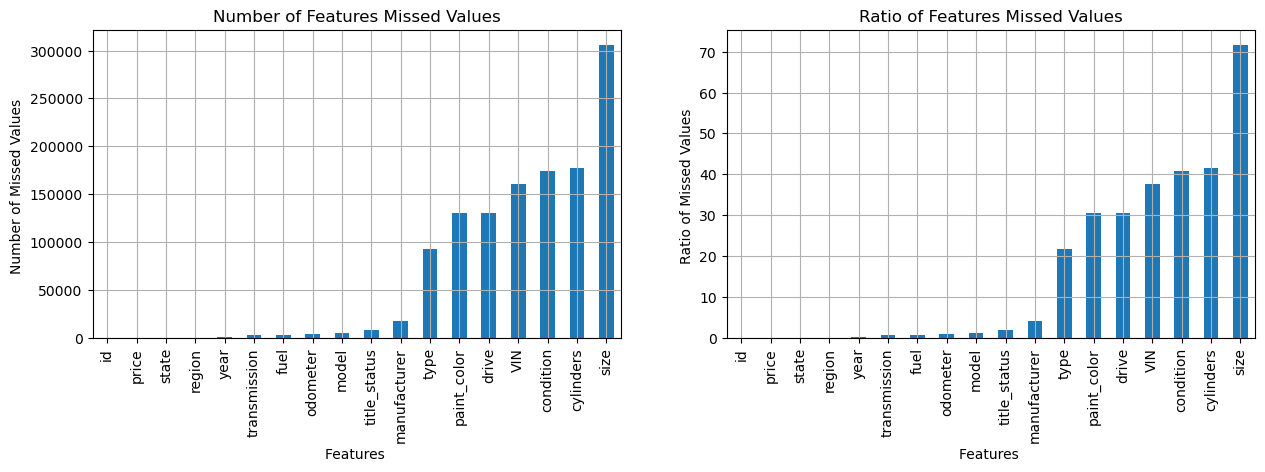

In [3]:
# Explore Missing Values , no of Unique values 
fig, ax = plt.subplots(1, 2, figsize = (15, 4))
vech_df.isnull().sum().sort_values().plot.bar(ax=ax[0])
ax[0].grid()
ax[0].set_title('Number of Features Missed Values')
ax[0].set_xlabel('Features ')
ax[0].set_ylabel(('Number of Missed Values '))
((vech_df.isnull().sum().sort_values()/vech_df.shape[0])*100).plot.bar(ax=ax[1])
ax[1].grid()
ax[1].set_title('Ratio of Features Missed Values');
ax[1].set_xlabel('Features ')
ax[1].set_ylabel(('Ratio of Missed Values '))
plt.savefig('./images/Missing_Values.png')
#plt.show()

In [4]:
# Making a list of all categorical variables
cat_col= vech_df.select_dtypes(include=['object']).iloc[:0,:]

#Explore Data Frame  : No of Coloumns, Rows, Missing Values, Ratio of Missing Values, Unique Values of Every Features
print ("#"*40,"\n","Features : \n\n", vech_df.columns.tolist()) #get name of columns/features
print ("#"*40,"\nUnique values :  \n\n", vech_df.nunique())  #  count of unique values

# Printing number of count of each unique value in each column
#for column in cat_col:
#    print ("#####", column, "######")
#    print(vech_df[column].value_counts())
#    print("#" * 40)

######################################## 
 Features : 

 ['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state']
######################################## 
Unique values :  

 id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64


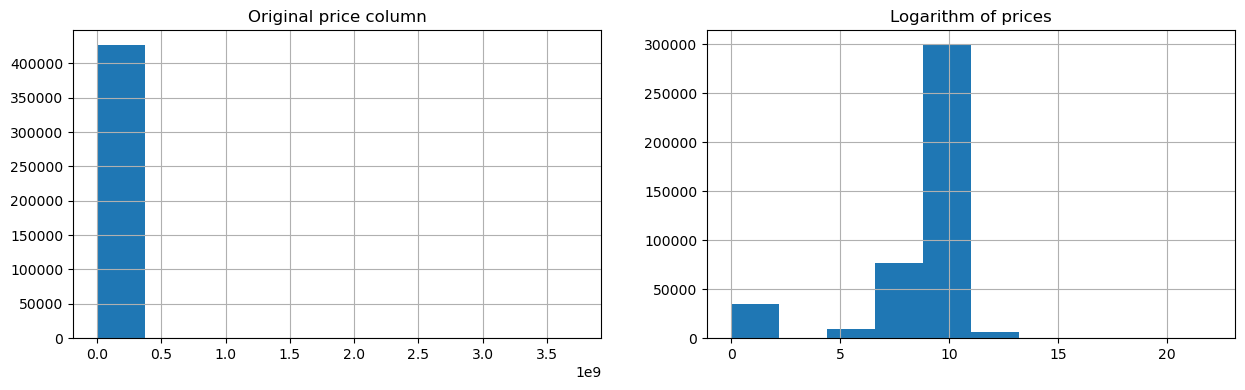

In [5]:
# Explore Output Variable Distribution
fig, ax = plt.subplots(1, 2, figsize = (15, 4))
ax[0].hist(vech_df['price'])
ax[0].grid()
ax[0].set_title('Original price column')
ax[1].hist(np.log1p(vech_df['price']))
ax[1].grid()
ax[1].set_title('Logarithm of prices');
plt.savefig('./images/price_distr.png')
#plt.show()

C:\Users\m3naej\AppData\Local\Temp\ipykernel_24312\1396847384.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(vech_df['price']),kde=False,color='blue')
C:\Users\m3naej\AppData\Local\Temp\ipykernel_24312\1396847384.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vech_df[variabl

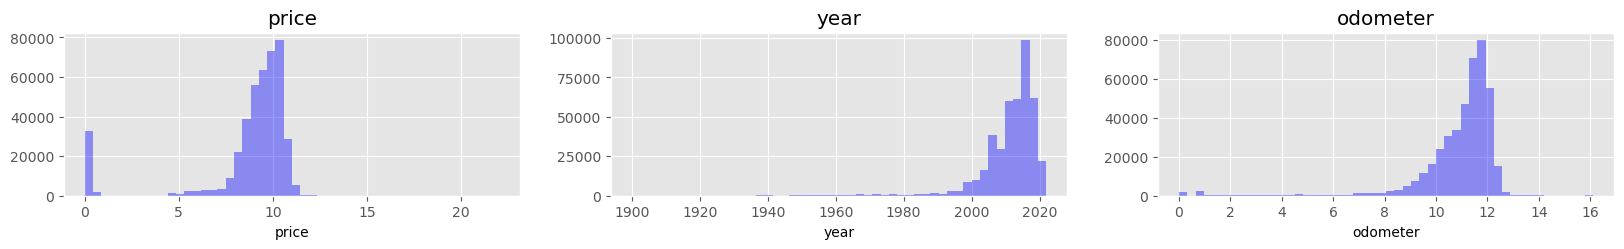

In [6]:
plt.style.use('ggplot')
#select all quantitative columns for checking the spread
numeric_columns = vech_df.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove('id')
plt.figure(figsize=(20,25))

for i, variable in enumerate(numeric_columns):
    plt.subplot(10,3,i+1)
    if (variable == 'odometer'):
        sns.distplot(np.log1p(vech_df['odometer']) , kde=False,color='blue')
    else:
        if (variable == 'price'):
            sns.distplot(np.log1p(vech_df['price']),kde=False,color='blue')
        else:
            sns.distplot(vech_df[variable],kde=False,color='blue') 
    #plt.tight_layout()
    plt.title(variable)
plt.savefig('./images/all_numeric_features_dist.png')
#plt.show()

In [7]:
#Check Duplicate Entries by Using ID

#find duplicate rows across all columns
duplicateRows = vech_df.loc[vech_df.duplicated(['id'])]

#find duplicate rows across specific columns
#duplicateRows = df[df.duplicated(['col1', 'col2'])]
duplicateRows.head(100)


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state


In [8]:
vech_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,426880.0,7.311487e+09,4.473170e+06,7.207408e+09,7.308143e+09,7.312621e+09,7.315254e+09,7.317101e+09
price,426880.0,7.519903e+04,1.218228e+07,0.000000e+00,5.900000e+03,1.395000e+04,2.648575e+04,3.736929e+09
year,425675.0,2.011235e+03,9.452120e+00,1.900000e+03,2.008000e+03,2.013000e+03,2.017000e+03,2.022000e+03
odometer,422480.0,9.804333e+04,2.138815e+05,0.000000e+00,3.770400e+04,8.554800e+04,1.335425e+05,1.000000e+07


## Conclusion1: Observation on Data
- price, year , odemeter are numerical data type
- cylinders : no of cylinders is categorical yet need to be converted to numerical
- VIN, ID : is not clear about their interpretation
- Some Categorical Data have huge number of Unique Values : model, VIN, region which make their encoding very difficuilt 
- These Categorical Data with Large Number of Unique Values Can be Dropped from the Model
- Some Features have huge number of missed values : size 70% Missed, 40% (cylinder, condition, VIN), ~30% (drive, paint, type) so we need to check further 

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

## Data Mainpulation 
- Drop NA from coloumns with Few Na 
- Complete NA in Cylinders , Change Cylinder to Float, Group by Manufactuerer/Year and Take the Median
- Extract Missed Type Values from Car Manufacturer Data
- Drop Coloumns such as ID, VIN
- Translate Car Year to Car Age

In [9]:
# Drop Na From Coloumns with Few Na (model, odometer, fuel, transmission, year) Since they have small numbers of na w.r.t data size
vech_df.dropna(subset = ['model', 'odometer', 'fuel', 'transmission', 'year', 'manufacturer'], inplace=True)
vech_df['drive'].replace ({'4wd' :'fwd'}, inplace = True)

In [10]:
vech_df['cylinders'].unique()

array(['8 cylinders', '6 cylinders', nan, '4 cylinders', '5 cylinders',
       '10 cylinders', '3 cylinders', 'other', '12 cylinders'],
      dtype=object)

In [11]:
# Cylinders Feature Processing
# Remove Cylinders string from the Feature, Convert it to Float
# Substitute Missed Values by Mean of Grouped by Mean of Same Manufacturer 
vech_df["cylinders_modified"] = vech_df["cylinders"]
vech_df["cylinders_modified"] = vech_df["cylinders_modified"].str.rstrip("cylinders ")
vech_df["cylinders_modified"] = vech_df["cylinders_modified"].str.replace('oth','nan')
vech_df["cylinders_modified"]

27          8
28          8
29          8
30          8
31          6
         ... 
426875      6
426876    NaN
426877    NaN
426878      6
426879    NaN
Name: cylinders_modified, Length: 396334, dtype: object

In [12]:
# Convert it to Float
vech_df['cylinders_modified'] = vech_df['cylinders_modified'].astype(float)
vech_df['cylinders_modified'].unique()

array([ 8.,  6., nan,  4.,  5., 10.,  3., 12.])

In [13]:
#Fill Cylinder NA with the mean of Same Car Manufacturers 
#vech_df['cylinders_modified'].fillna(vech_df.groupby(['manufacturer','year'])['cylinders_modified'].transform('median'))
vech_df['cylinders_modified'] = vech_df.groupby(['manufacturer'])['cylinders_modified'].apply(lambda x:x.fillna(x.median()))

C:\Users\m3naej\AppData\Local\Temp\ipykernel_24312\1971742629.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  vech_df['cylinders_modified'] = vech_df.groupby(['manufacturer'])['cylinders_modified'].apply(lambda x:x.fillna(x.median()))


In [14]:
vech_df['cylinders_modified'].isnull().sum()

0

In [15]:
# Extract Car Type From Data in Model Coloumn
compare_list = ["pickup", "truck", "coupe", "suv", "SUV", "hatchback", \
                "mini-van", "sedan", "offroad", "bus", "van", "convertible", "wagon","cab"]
def check(x):
    for i in compare_list:
        if i in x:
            return i
vech_df['model_modified'] = vech_df['model']
vech_df['type_modified'] = vech_df['type']
vech_df['type_modified'] = vech_df['type_modified'].fillna(vech_df['model_modified'].apply(check))
vech_df['type_modified'].replace ({'SUV' :'suv', 'cab': 'pickup'}, inplace = True)
print (vech_df['type_modified'].isnull().sum())
print (vech_df['type'].isnull().sum())
vech_df['type_modified'].unique()
#vech_df['type_modified'].value_counts()
#vech_df.loc[(vech_df['type_modified'].isnull()) & (vech_df['model_modified'].str.contains("pickup|truck|coupe|suv|SUV|hatchback|mini-van|sedan|offroad|bus|van|convertible|wagon|cab"))]

77829
82907


array(['pickup', 'truck', 'other', None, 'coupe', 'suv', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'van', 'convertible', 'wagon',
       'bus'], dtype=object)

In [16]:
# Drop Coloumns that Have been Modified or Irrelevant
vech_df.drop(columns=['cylinders', 'model','model_modified', 'type', 'VIN', 'region', 'id'], inplace=True)

In [17]:
vech_df.rename(columns = {'type_modified': 'type', 'cylinders_modified': 'cylinders' }, inplace = True)

In [18]:
# Translate the Year of Car to Car Age
vech_df['current_year']=2023
#vech_df['year'].min()
vech_df['Car-Age']=vech_df['current_year']-vech_df['year']
vech_df.drop('current_year',axis=1,inplace=True)
#vech_df.head(10)

['manufacturer', 'condition', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'paint_color', 'state', 'type']


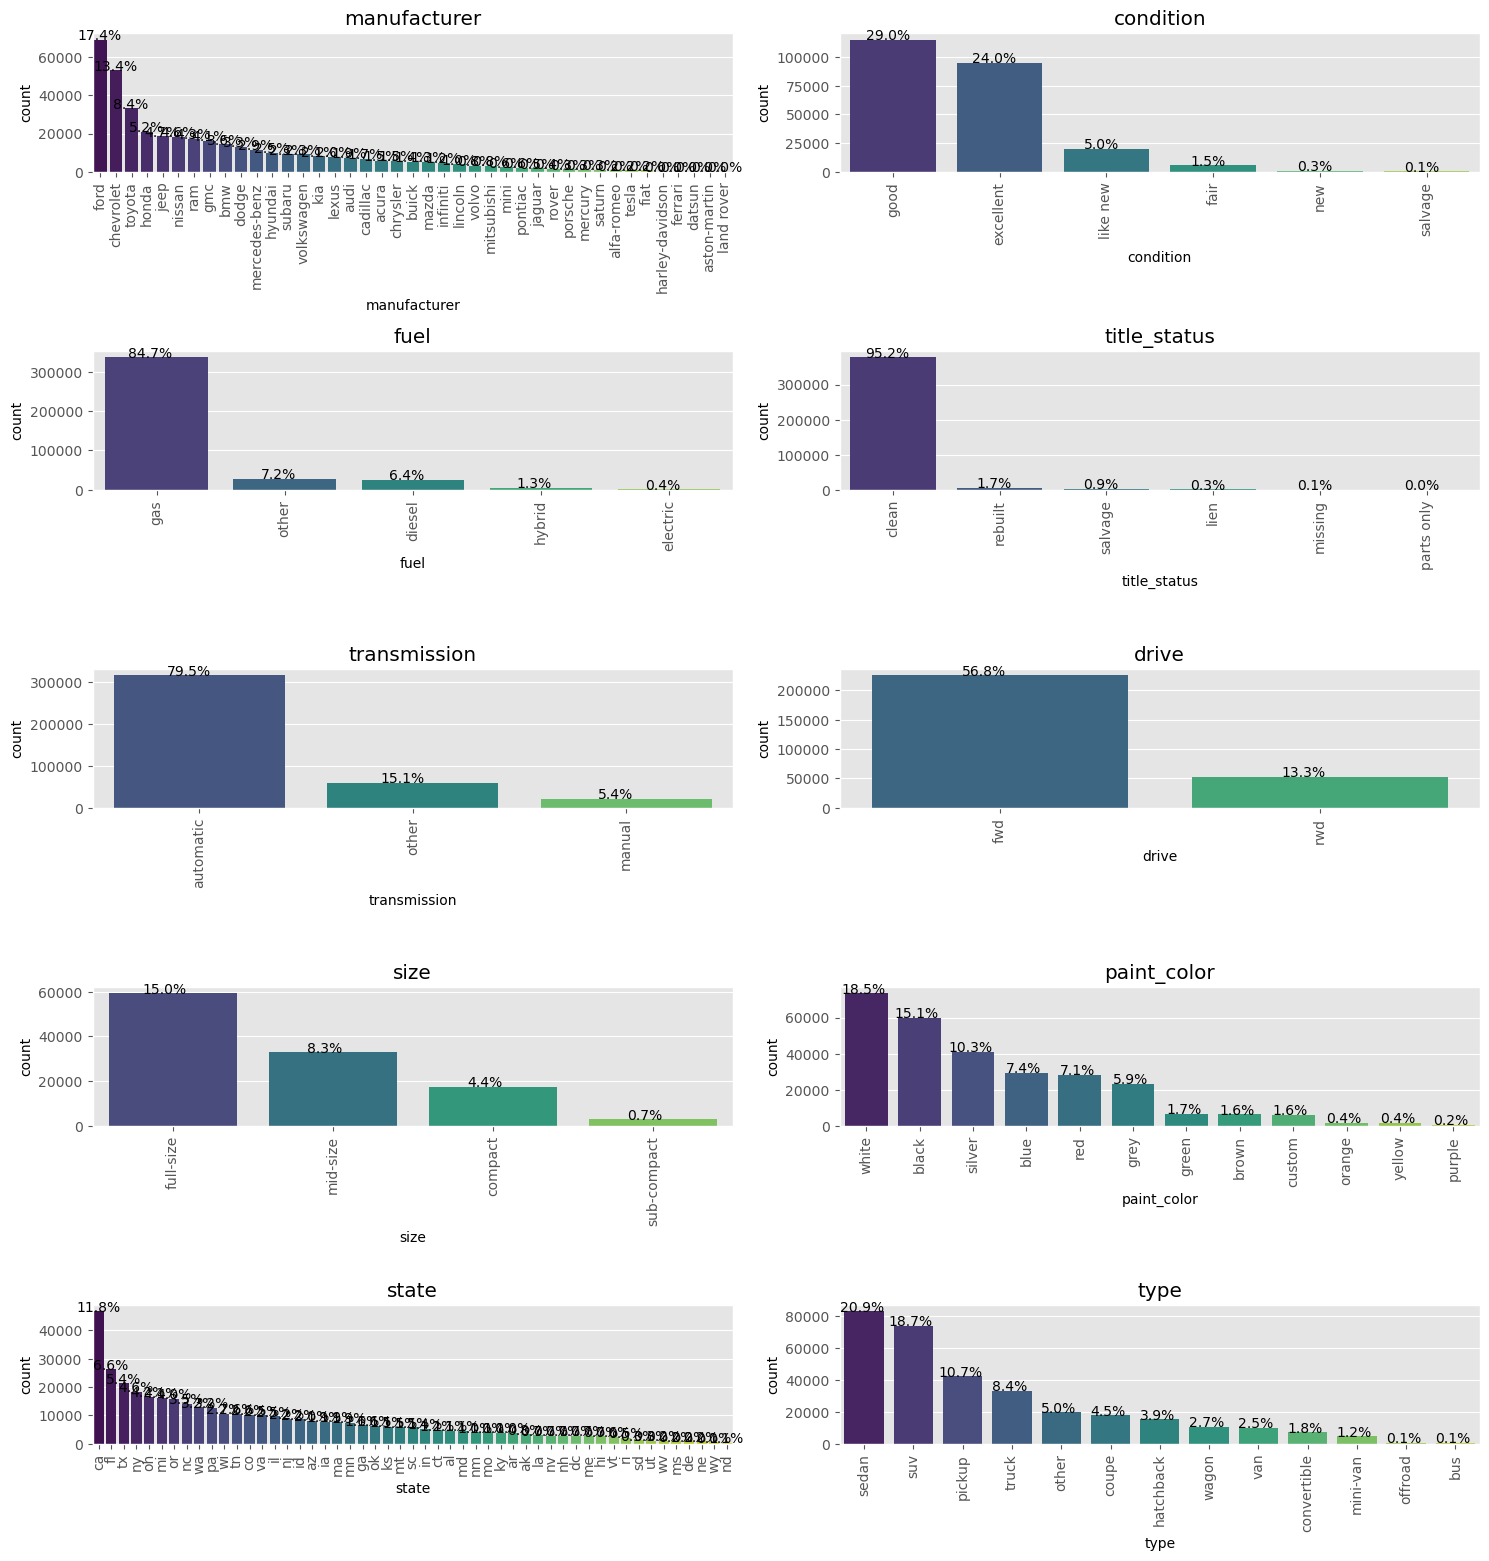

In [19]:
cat_columns= vech_df.select_dtypes(exclude=np.number).columns.tolist()
print(cat_columns)

plt.figure(figsize=(15,21))

for i, variable in enumerate(cat_columns):
                     plt.subplot(7,2,i+1)
                     order = vech_df[variable].value_counts(ascending=False).index    
                     ax=sns.countplot(x=vech_df[variable], data=vech_df , order=order ,palette='viridis')
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(vech_df[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.xticks(rotation=90)
                     plt.tight_layout()
                     plt.title(variable)
                    

plt.savefig('./images/all_Categorical_features_dist.png')
#plt.show()

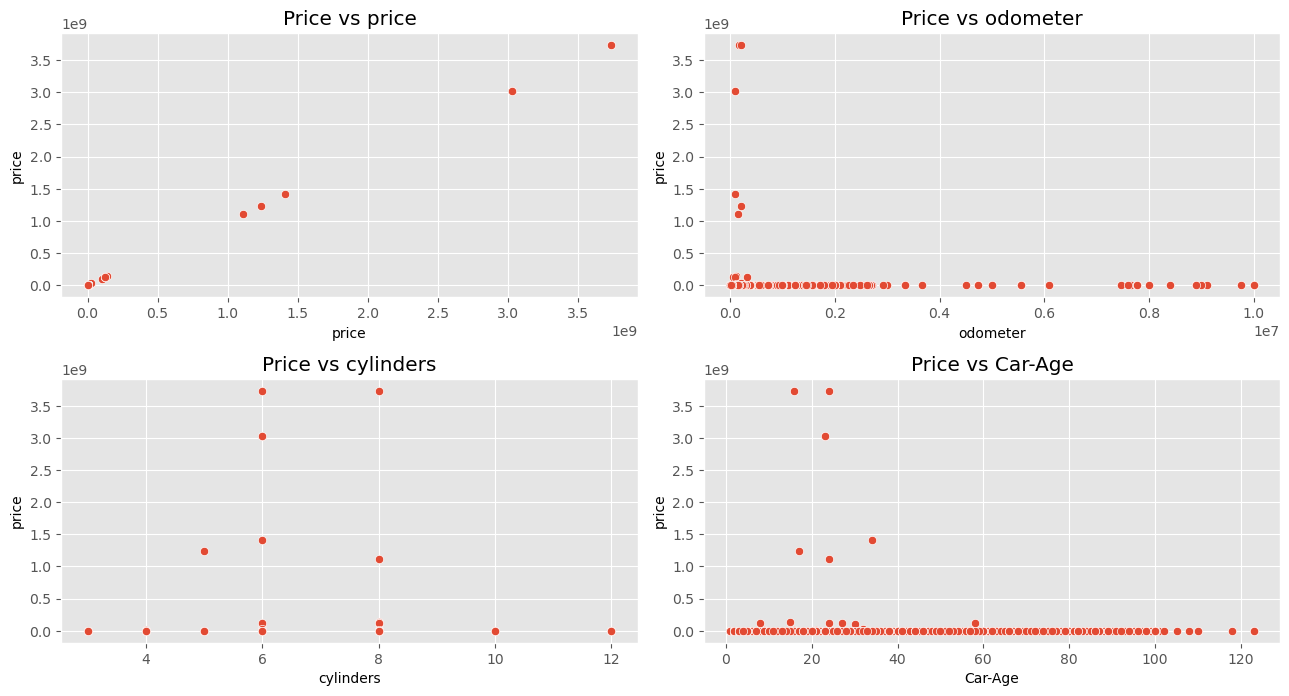

In [20]:
numeric_columns= numeric_columns = vech_df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(13,17))
numeric_columns.remove('year')
for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,2,i+1)
                     sns.scatterplot(x=vech_df[variable],y=vech_df['price']).set(title='Price vs '+ variable)
                     #plt.xticks(rotation=90)
                     plt.tight_layout()
plt.savefig("./images/Numerical_Features_vs_Price_Scatter.png")
#plt.show()

C:\Users\m3naej\AppData\Local\Temp\ipykernel_24312\3909059799.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(vech_df.corr(),annot=True ,cmap="YlGnBu" )


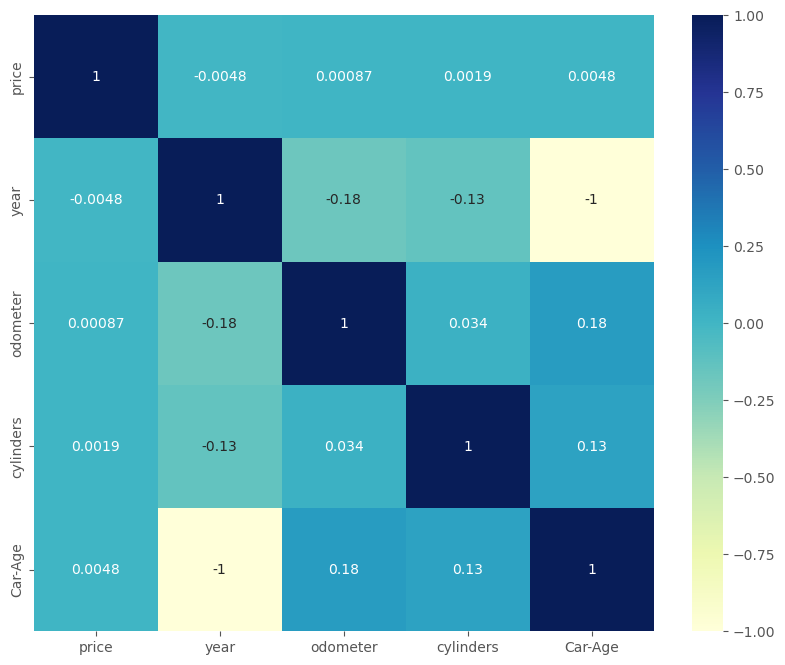

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(vech_df.corr(),annot=True ,cmap="YlGnBu" )
plt.savefig('./images/corr_fig1.png')
#plt.show()

## Conclusion 2: Observation of Data 
- Price and Odometer have outliers , so data will be filtered to contain cars with odometer < 500,000 and prices < 999,999,999
- 95% of title_status is clean, so it will not be relevant to our prediction
- Car age, odometer in range have negative correlation with price, while cylinders have positive impact

In [22]:
# Handle Outliers
# calculate IQR for column odometer, price
Q1 = vech_df['price'].quantile(0.25)
Q3 = vech_df['price'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
price_outliers = vech_df[(vech_df['price'] < Q1 - threshold * IQR) | (vech_df['price'] > Q3 + threshold * IQR)]

Q1_1 = vech_df['odometer'].quantile(0.25)
Q3_3 = vech_df['odometer'].quantile(0.75)
IQR_1 = Q3_3 - Q1_1
odometer_outliers = vech_df[(vech_df['odometer'] < Q1_1 - threshold * IQR_1) | (vech_df['odometer'] > Q3_3 + threshold * IQR_1)]
vech_df = vech_df.drop(odometer_outliers.index)

In [23]:
#Drop more irrelevant coloumns & Coloumns with many missed data
#data = vech_df.loc[(vech_df['odometer'] < 500000) & (vech_df['price'] < 99999999) & (vech_df['price'] > 1000)].dropna()
data = vech_df.loc[(vech_df['odometer'] < 500000) & (vech_df['price'] < 99999999) & (vech_df['price'] > 1000)]

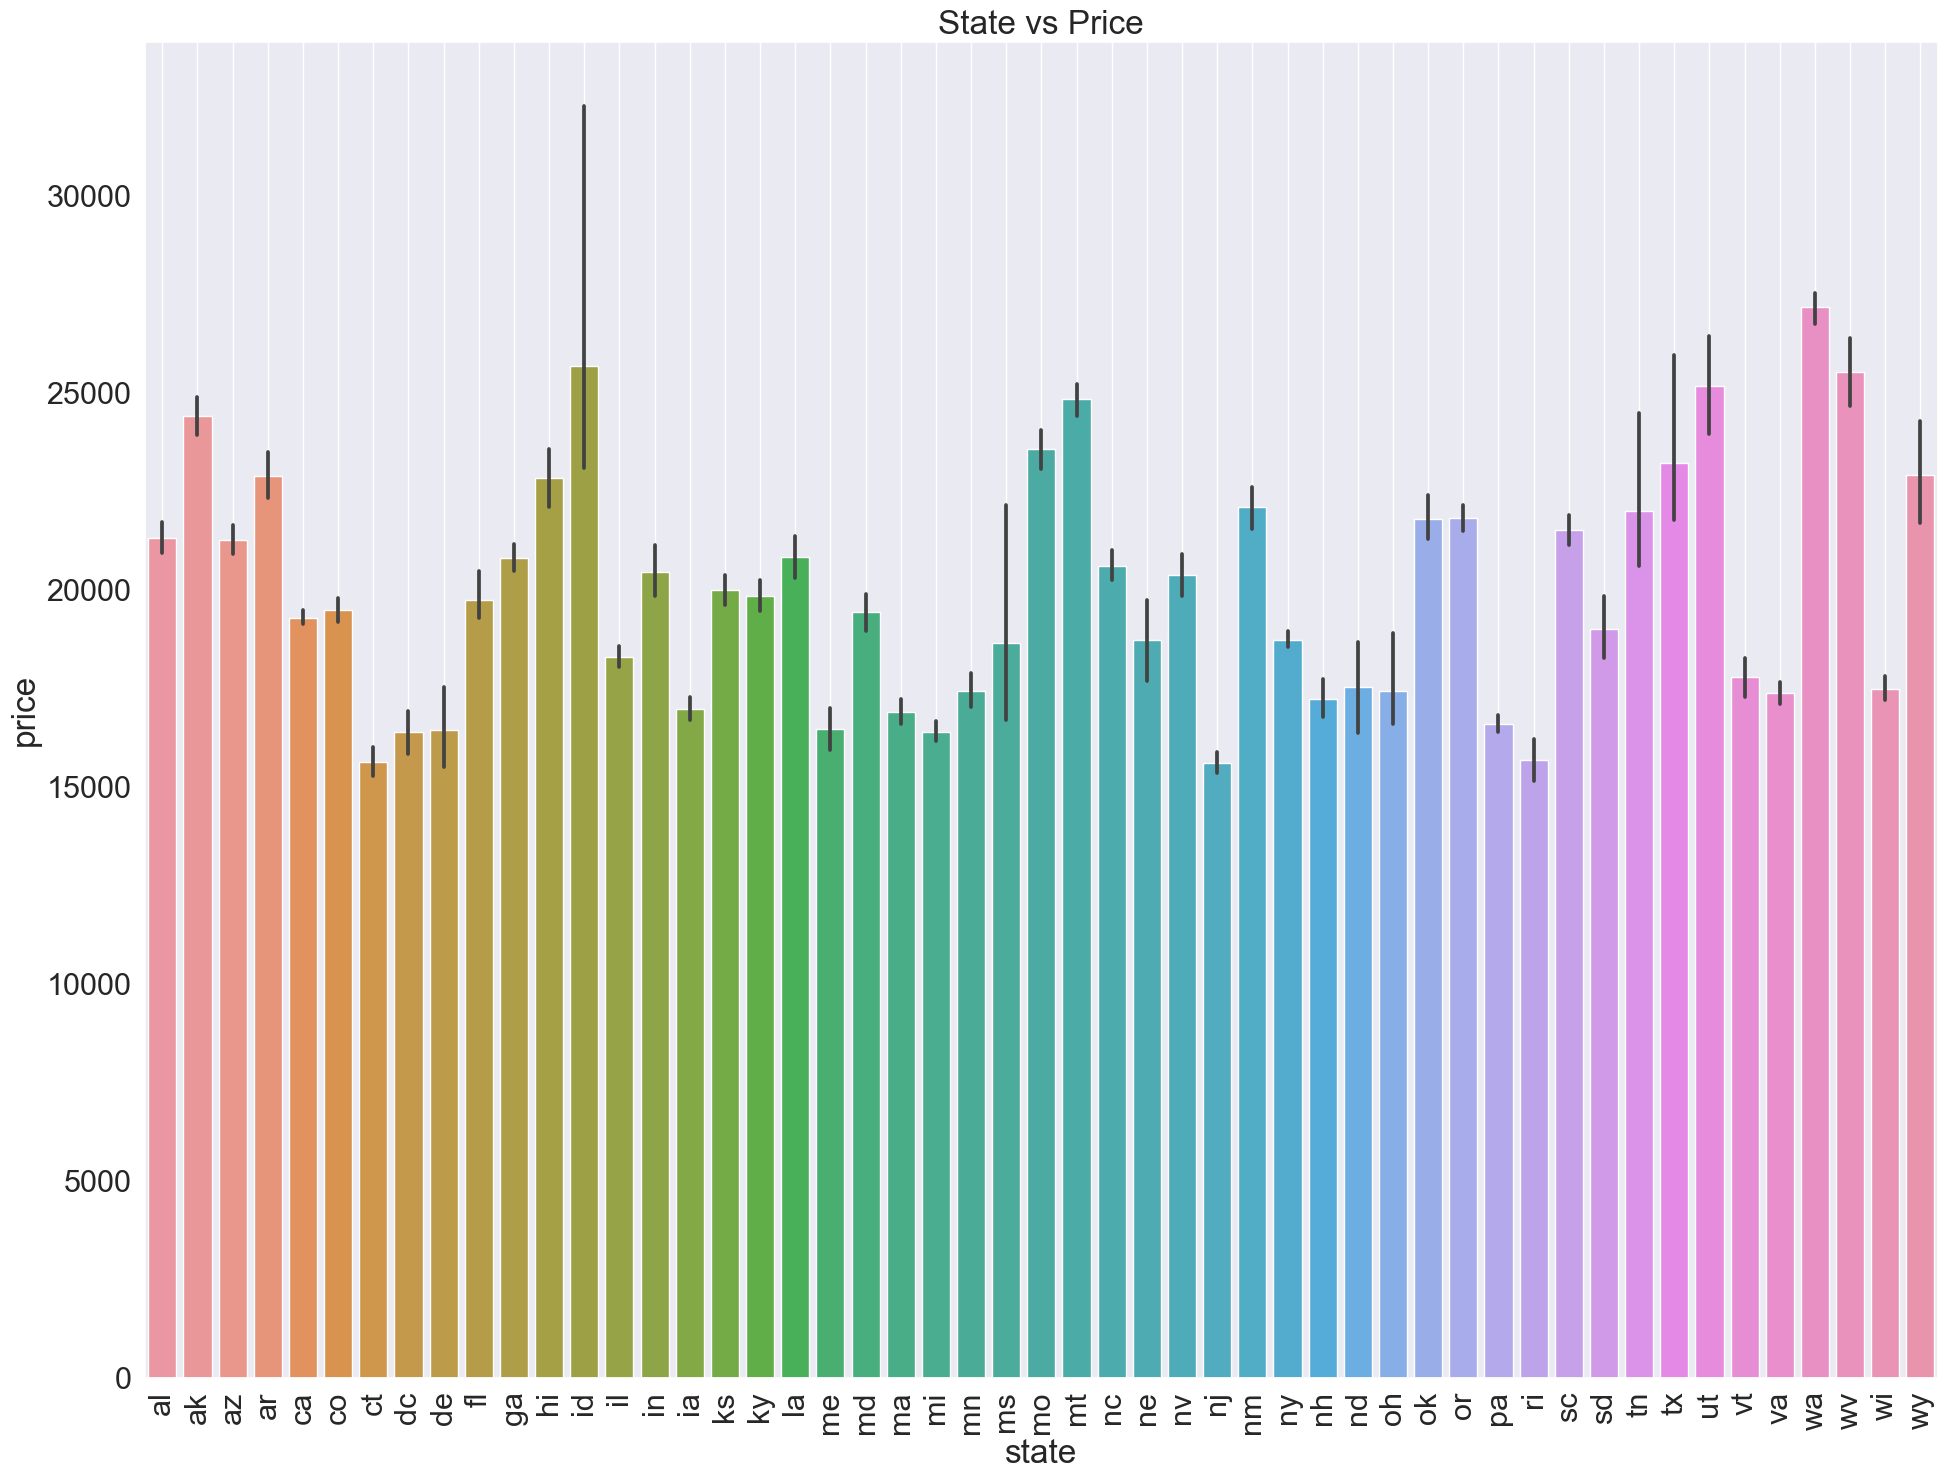

In [24]:
#Price and LOcation 
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='state', y='price', data=data)
plt.grid()
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('State vs Price')
plt.savefig('./images/statevsprice.png')
#plt.show()

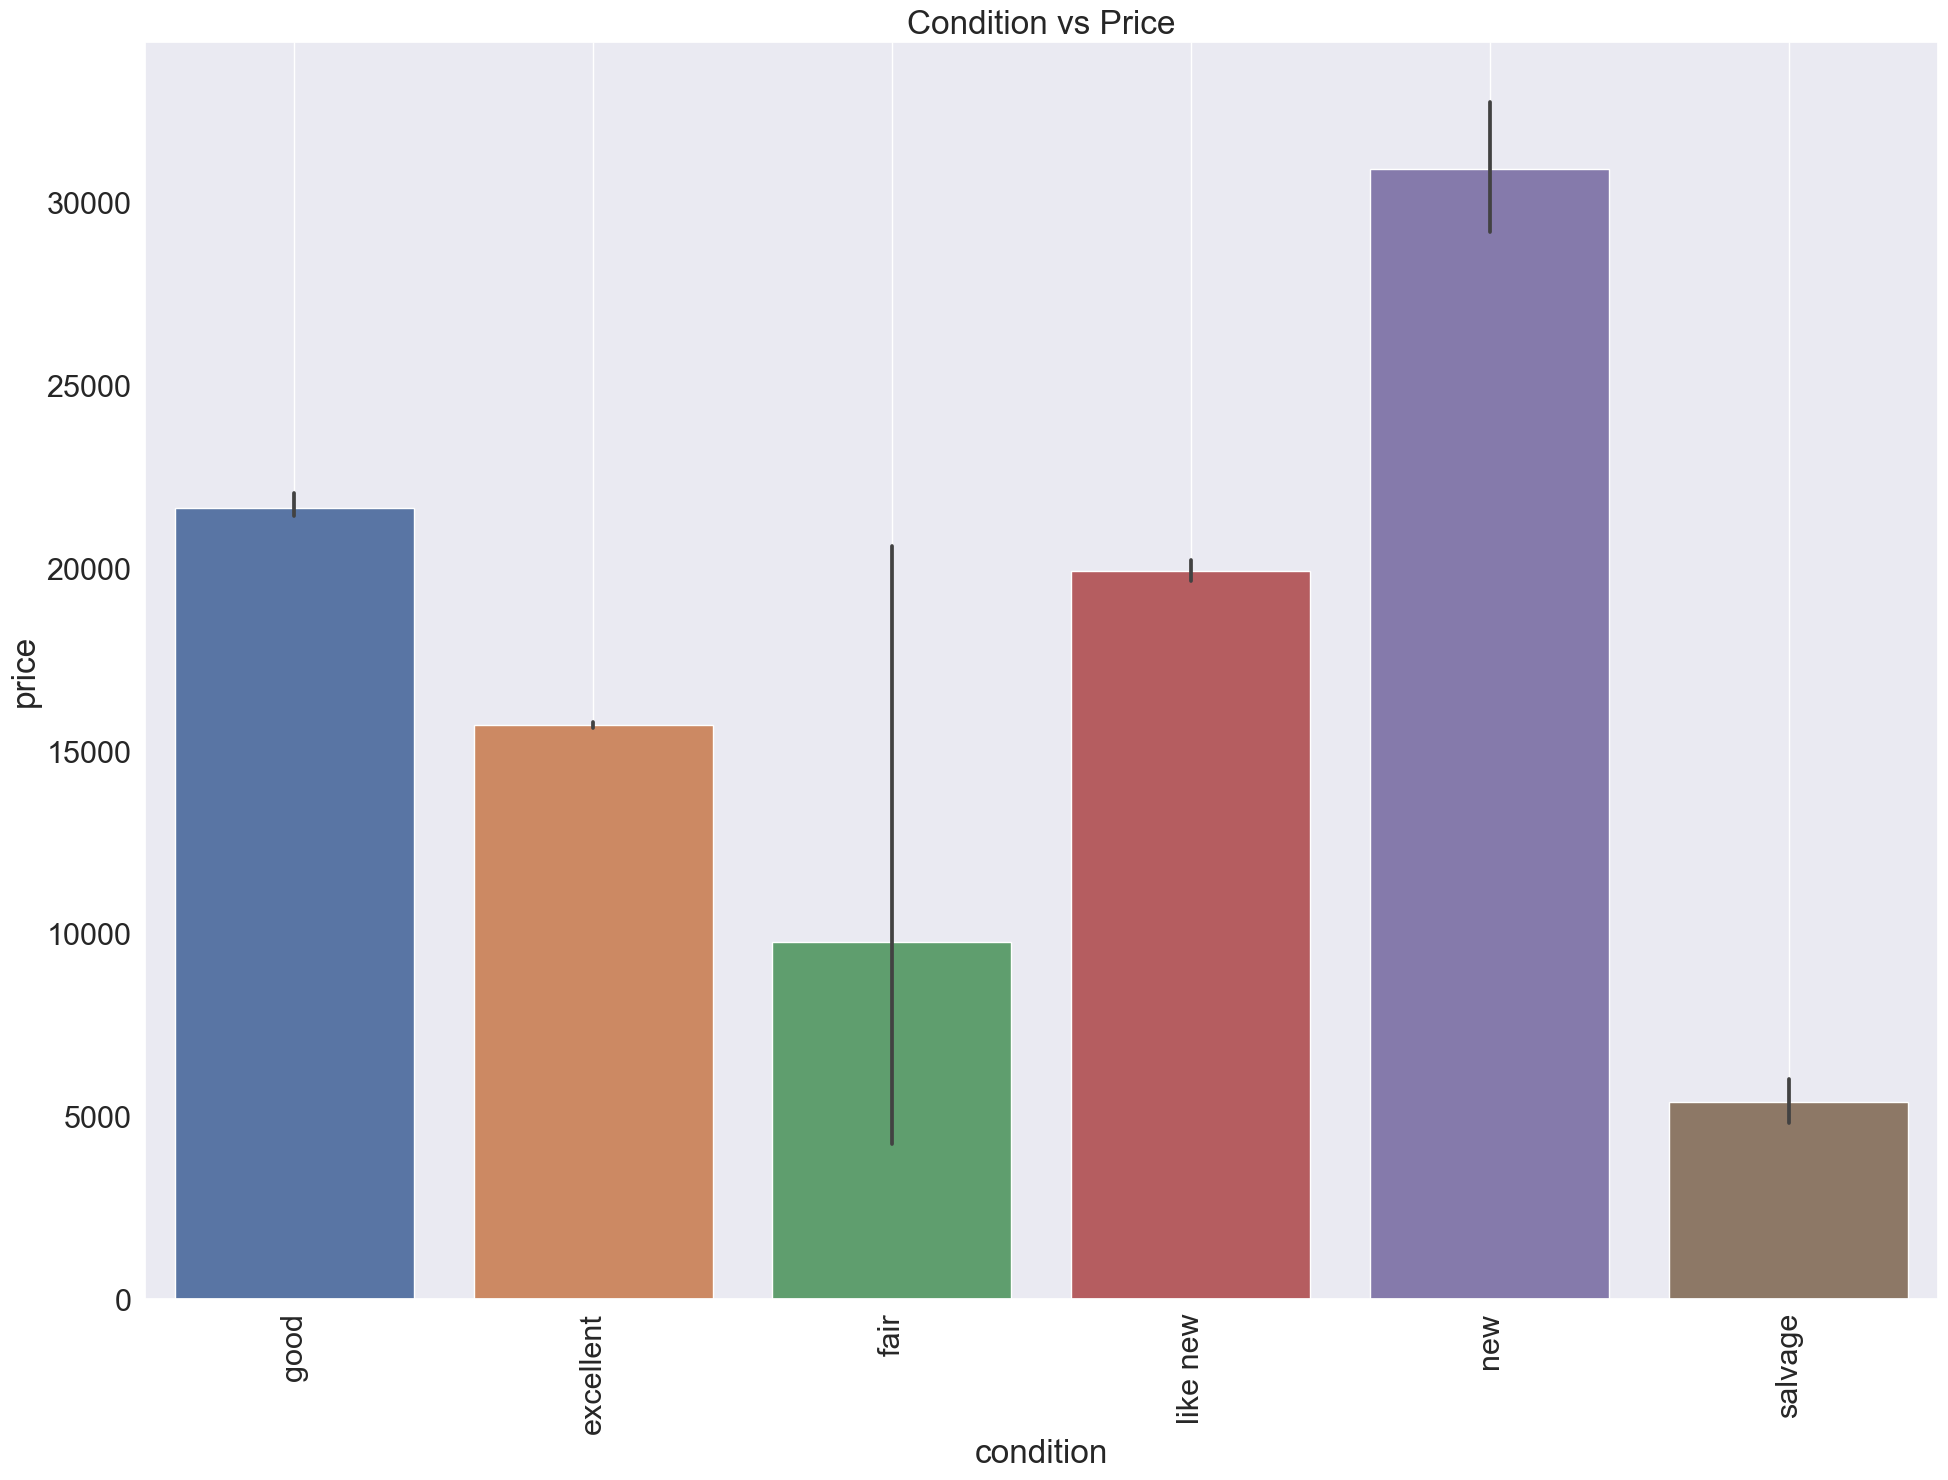

In [25]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='condition', y='price', data=data)
plt.grid()
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Condition vs Price')
plt.savefig('./images/condition_vs_price.png')
#plt.show()

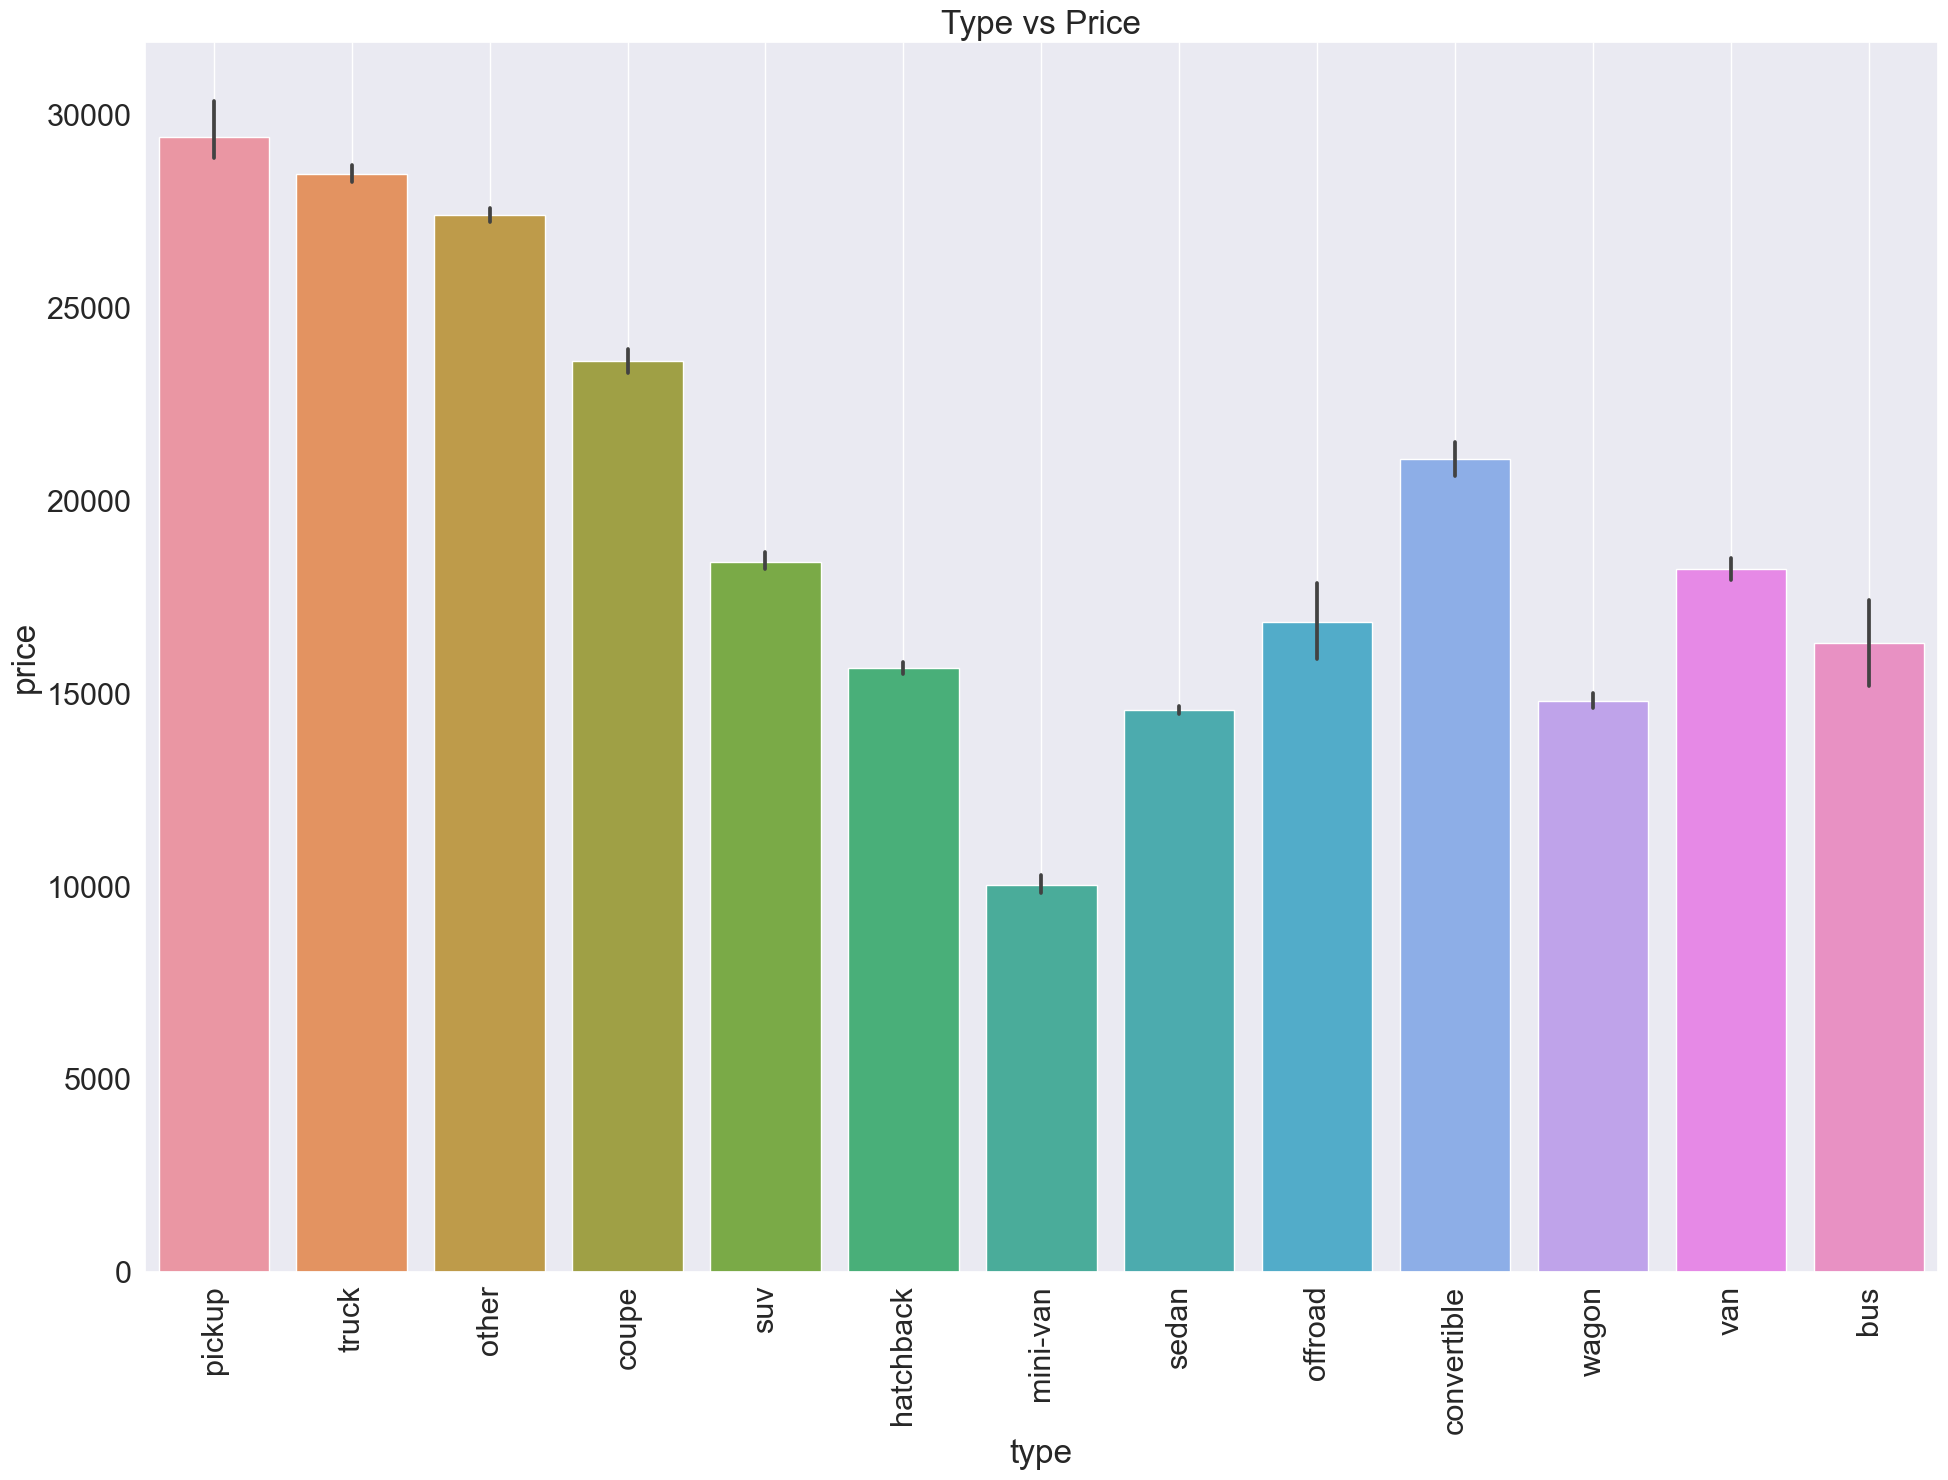

In [26]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='type', y='price', data=data)
plt.grid()
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Type vs Price')
plt.savefig('./images/type_vs_price.png')
#plt.show()

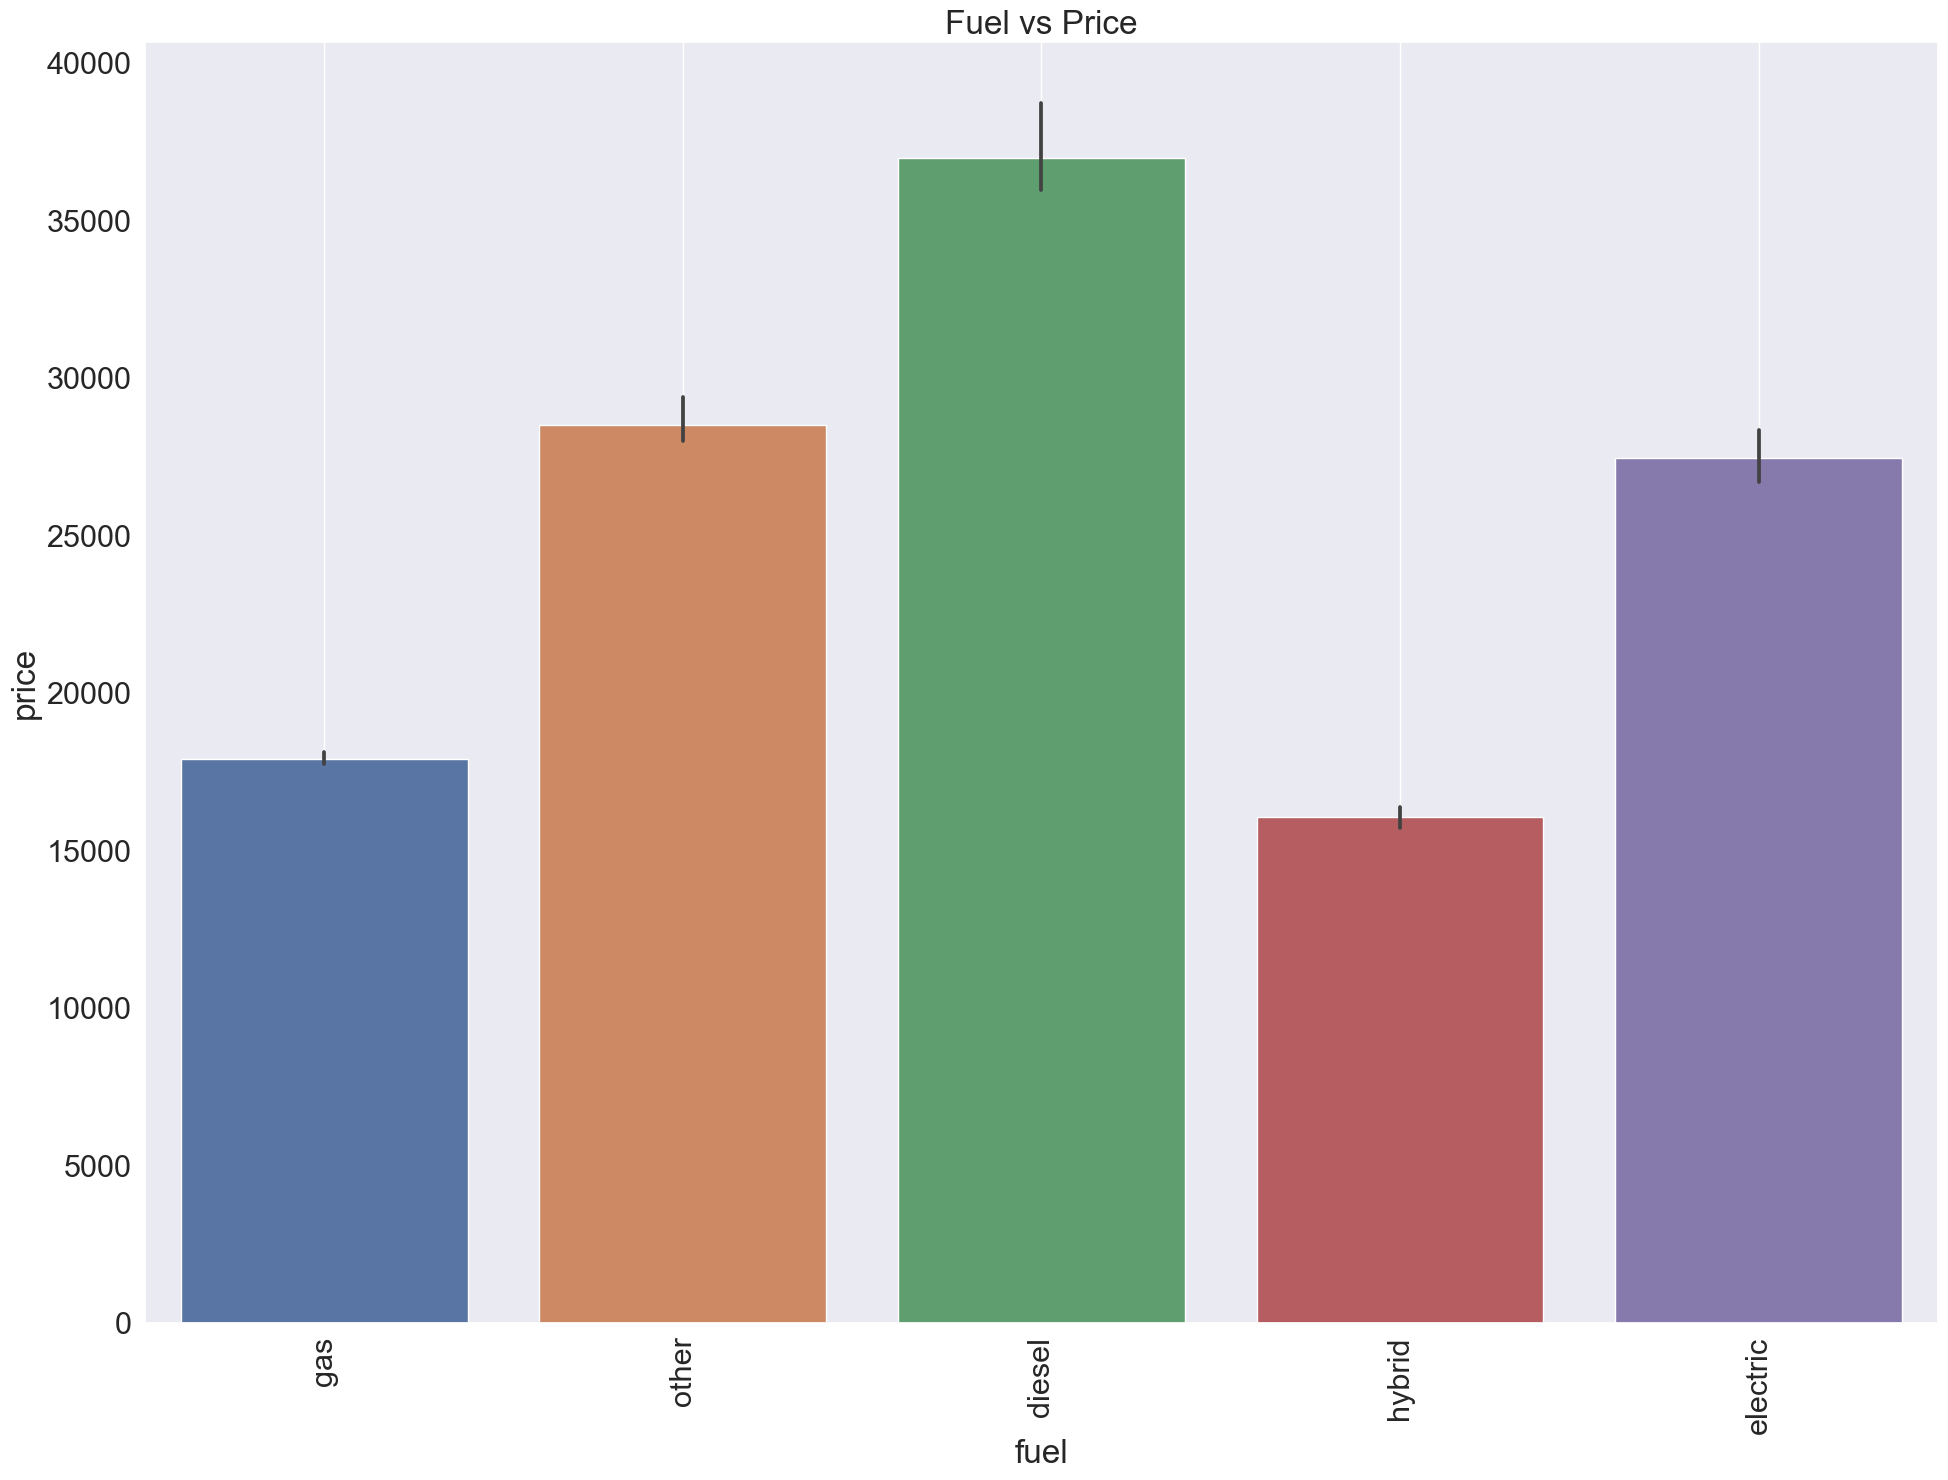

In [27]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='fuel', y='price', data=data)
plt.grid()
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Fuel vs Price')
plt.savefig('./images/fuel_vs_price.png')
#plt.show()

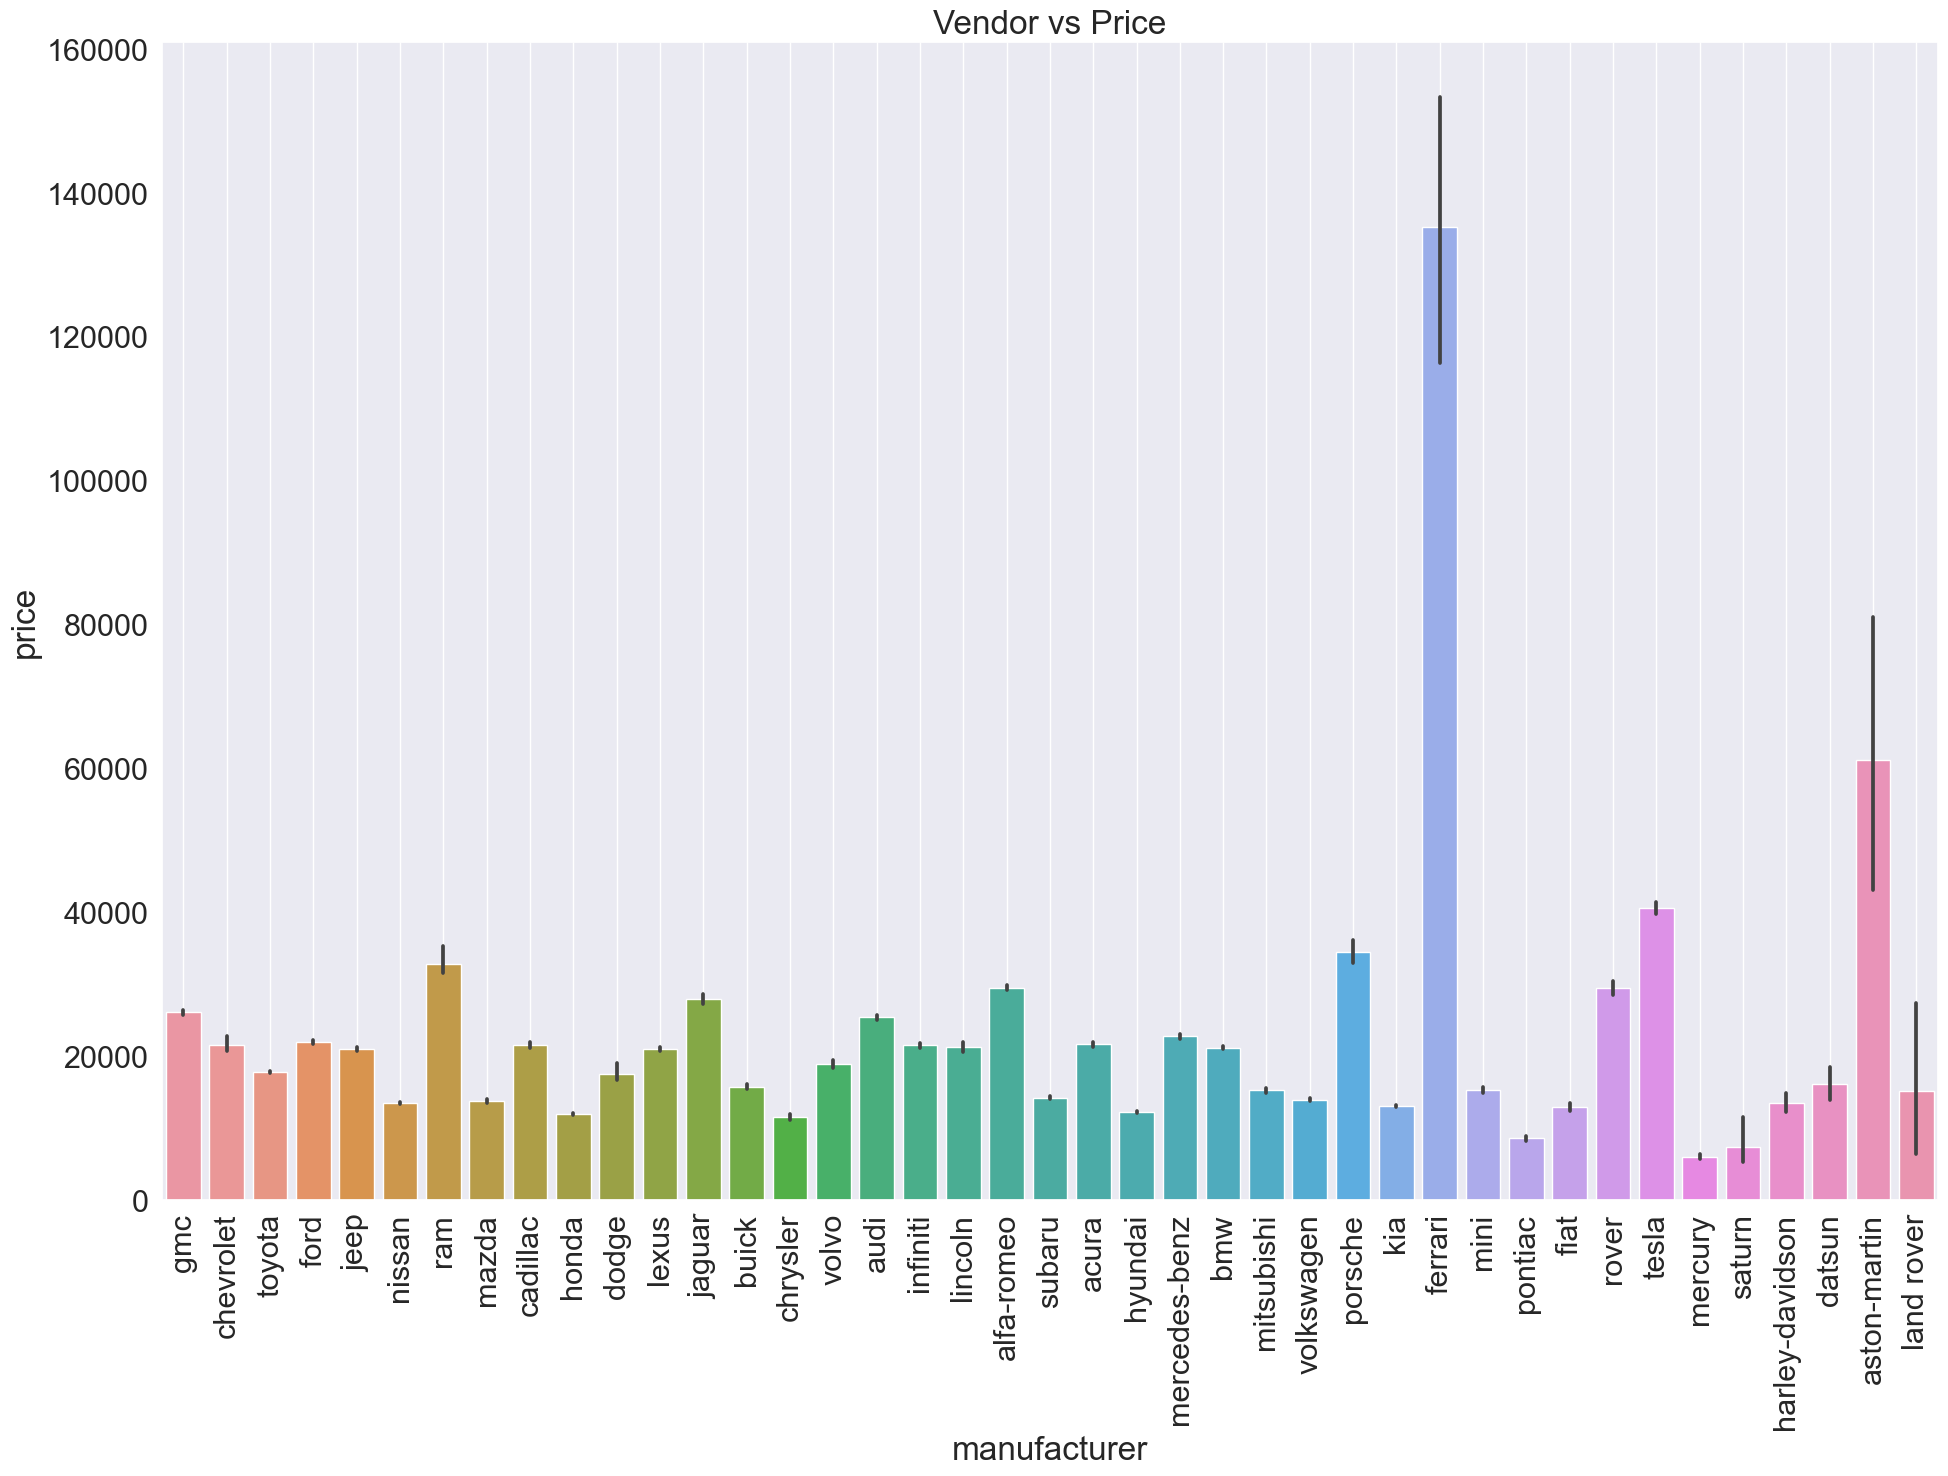

In [28]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='manufacturer', y='price', data=data)
plt.grid()
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Vendor vs Price')
plt.savefig('./images/vendor_vs_price.png')
#plt.show()

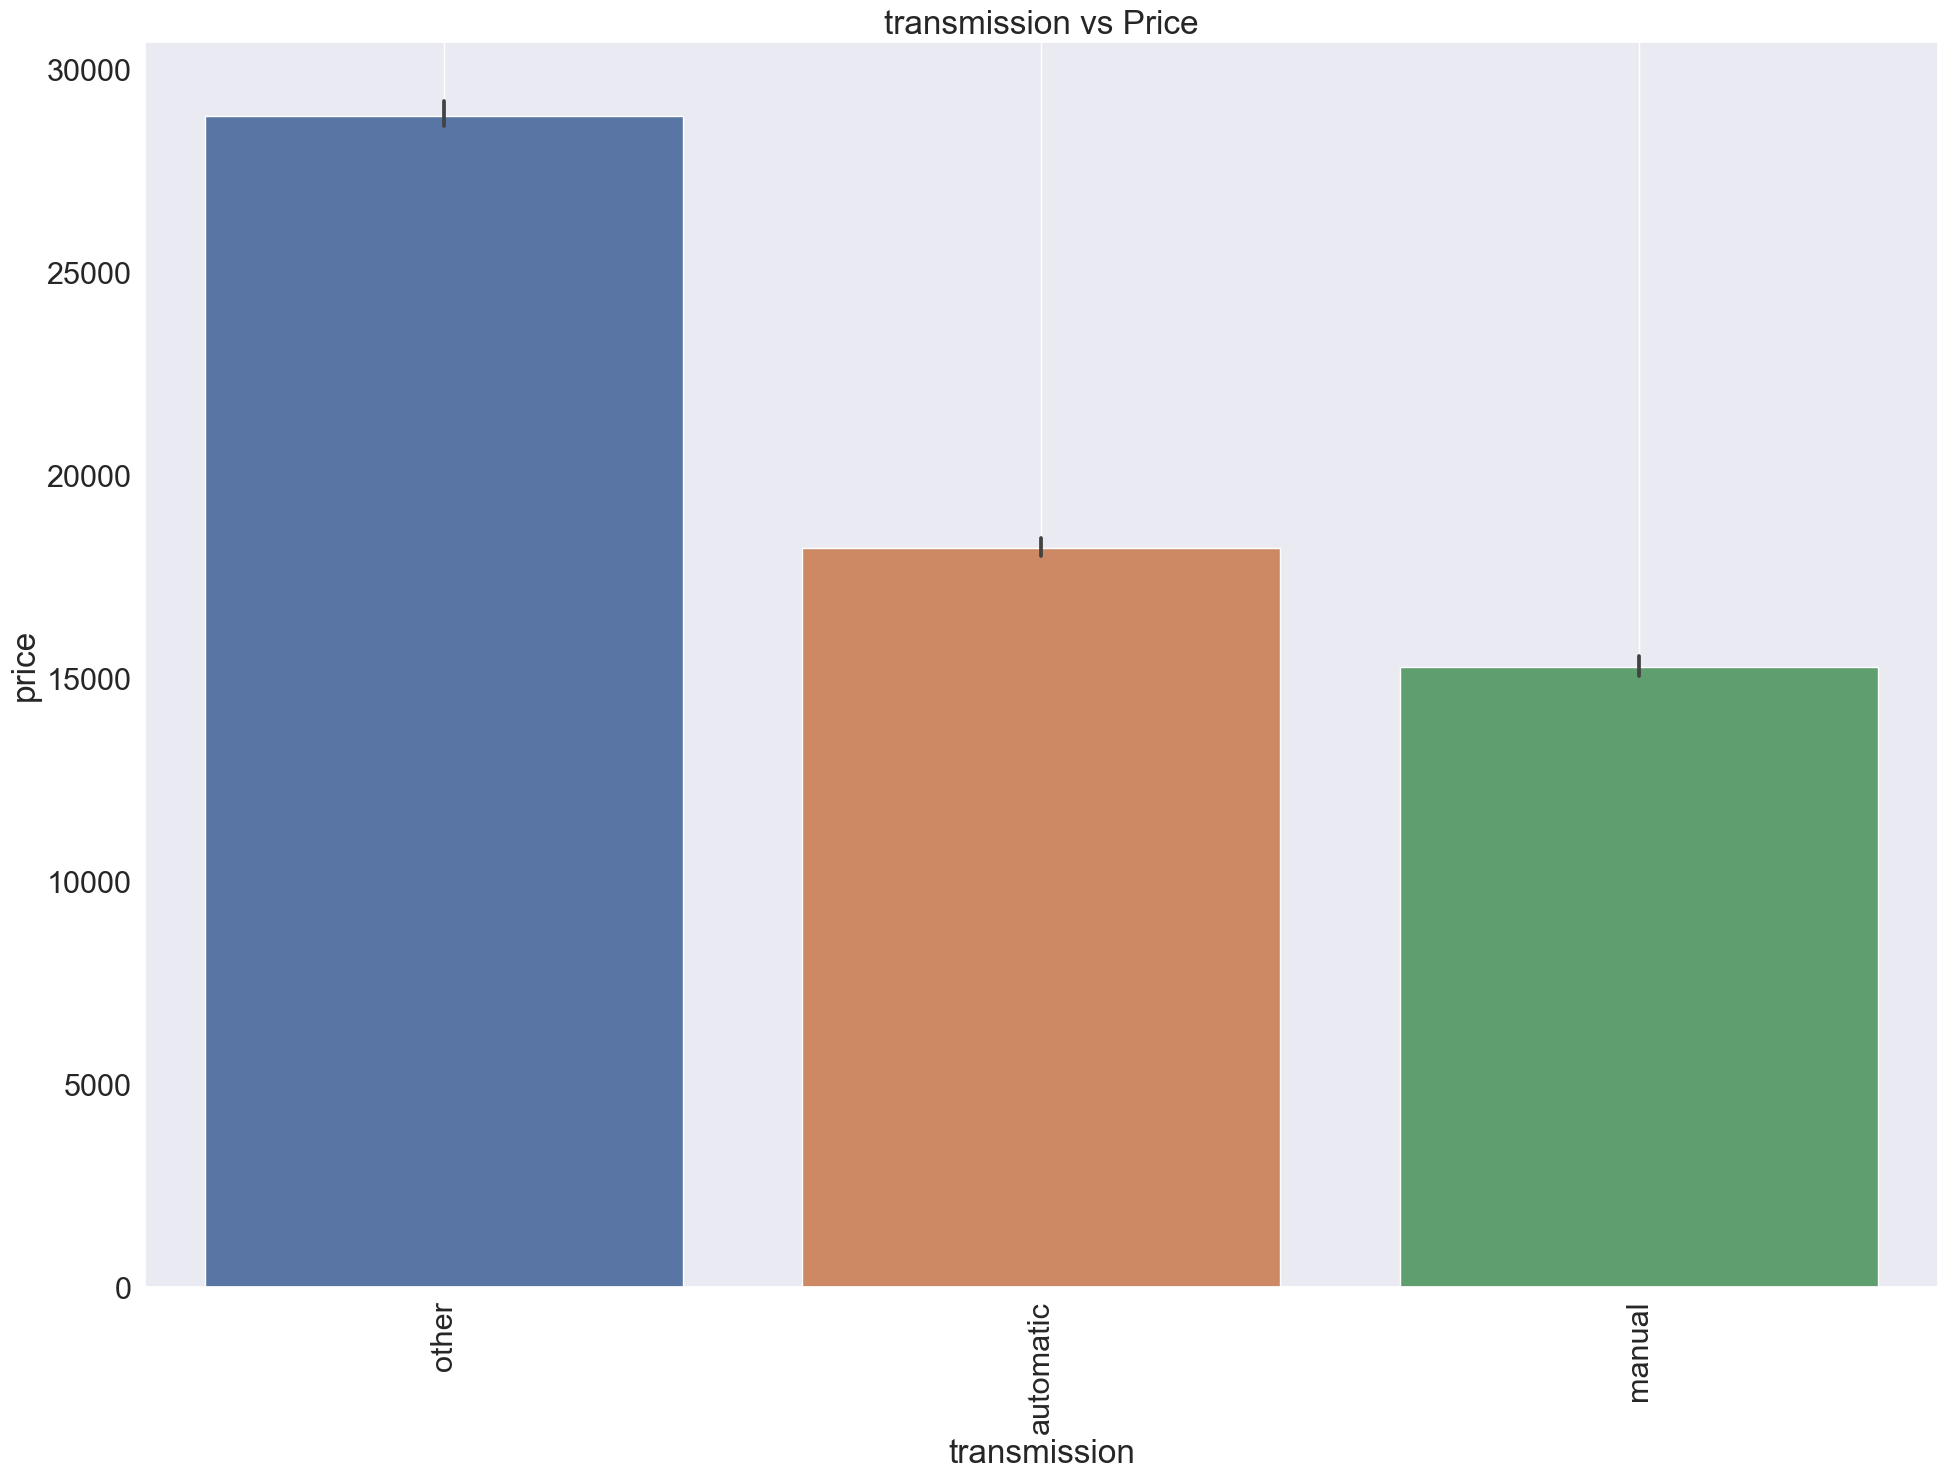

In [29]:
#'transmission', 'drive', 'size', 'paint_color'
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='transmission', y='price', data=data)
plt.grid()
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('transmission vs Price')
plt.savefig('./images/transmission_vs_price.png')
#plt.show()

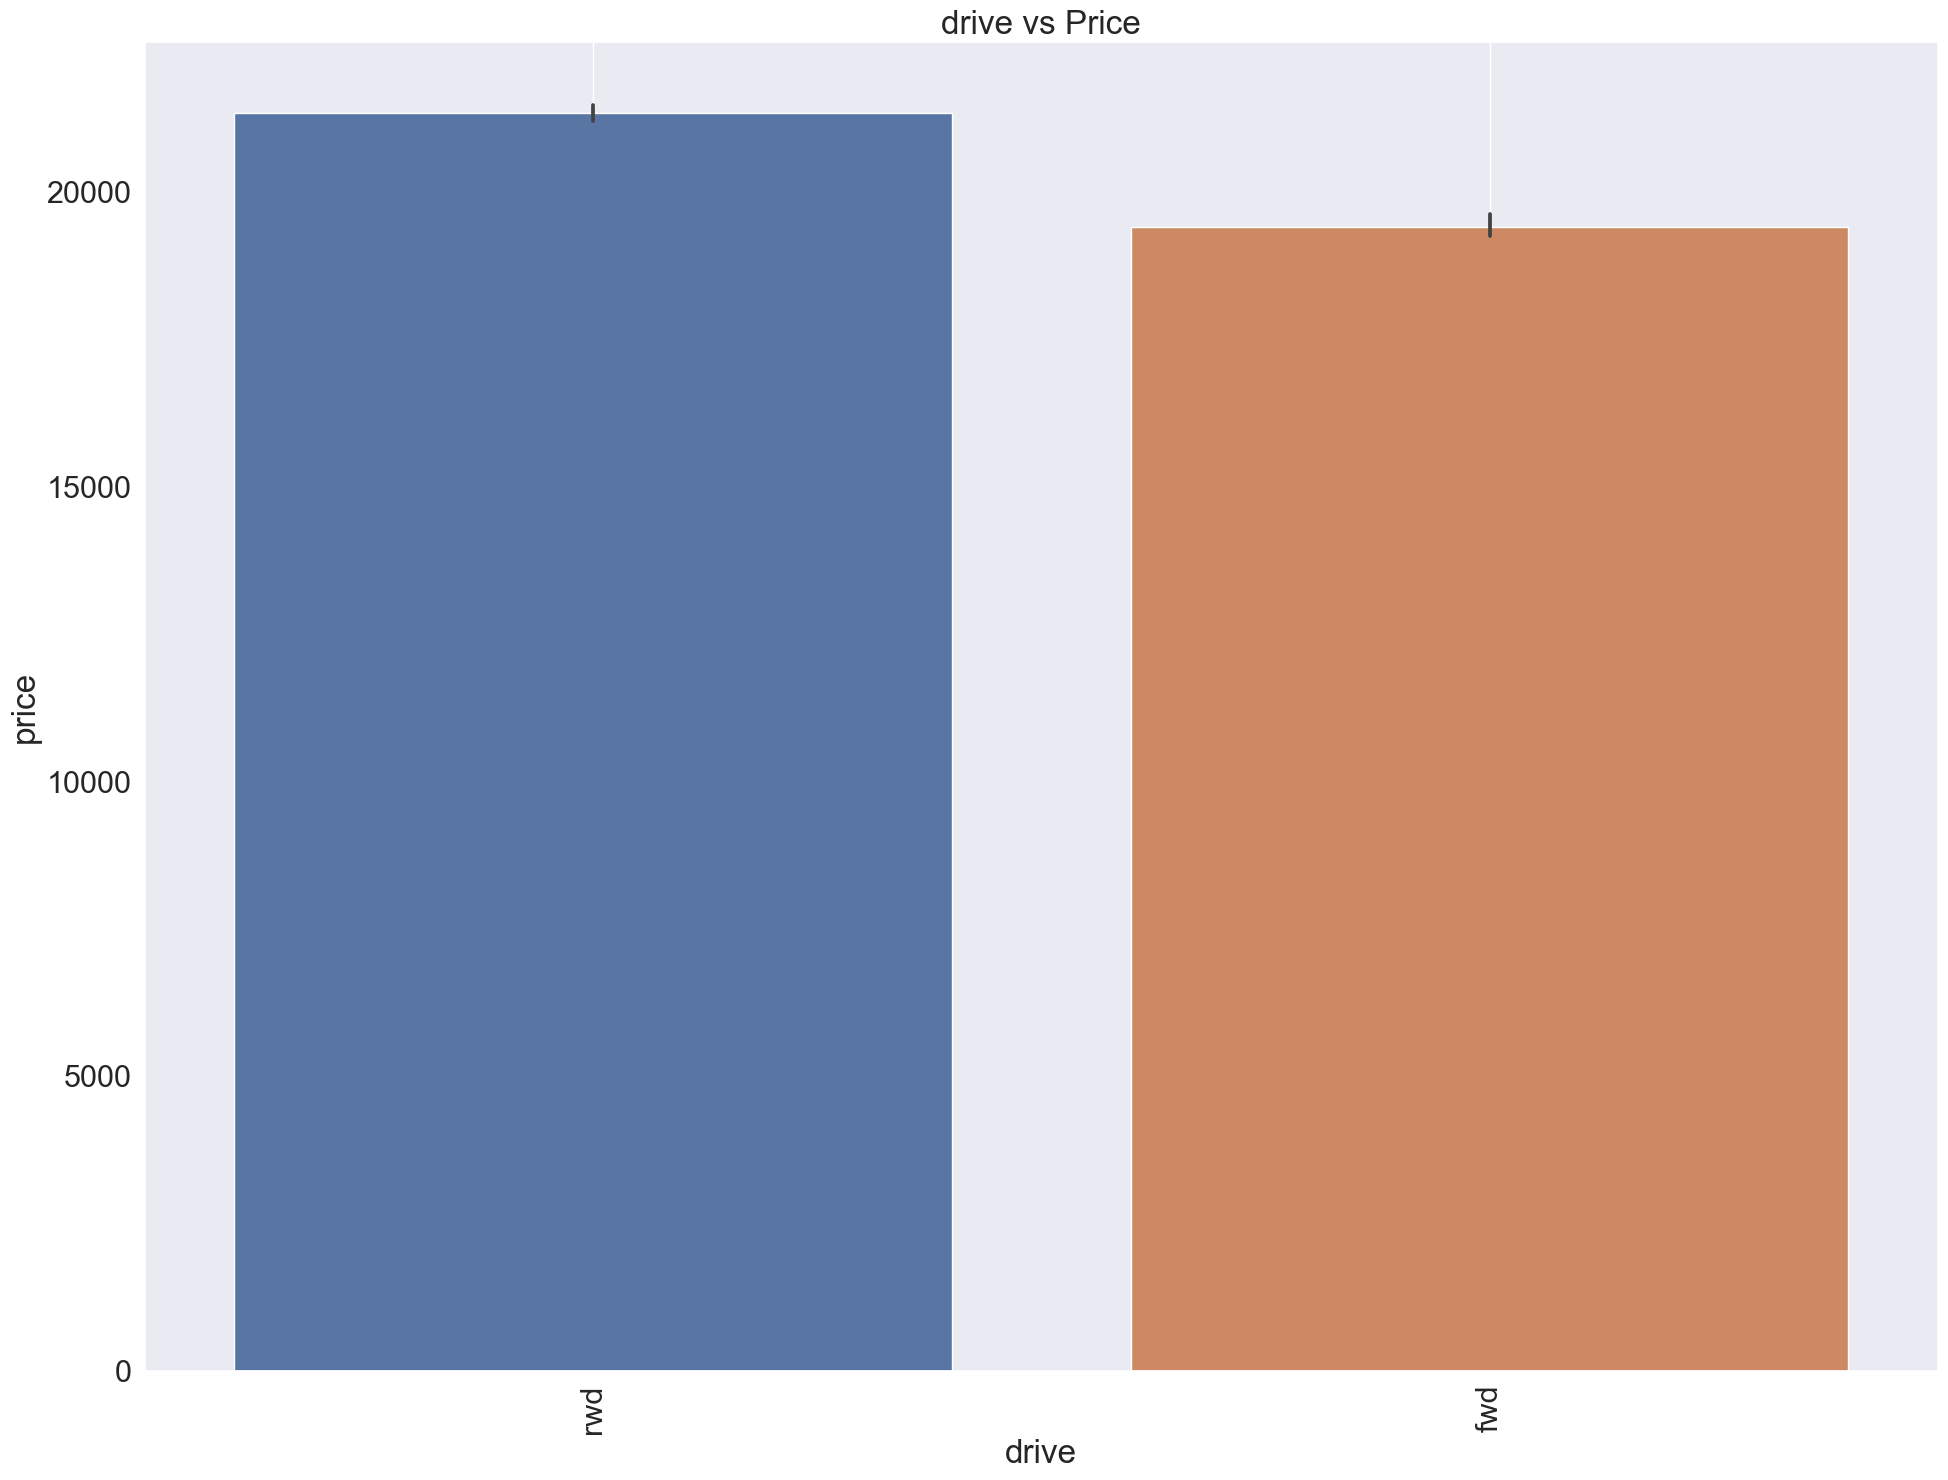

In [30]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='drive', y='price', data=data)
plt.grid()
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('drive vs Price')
plt.savefig('./images/drive_vs_price.png')
#plt.show()

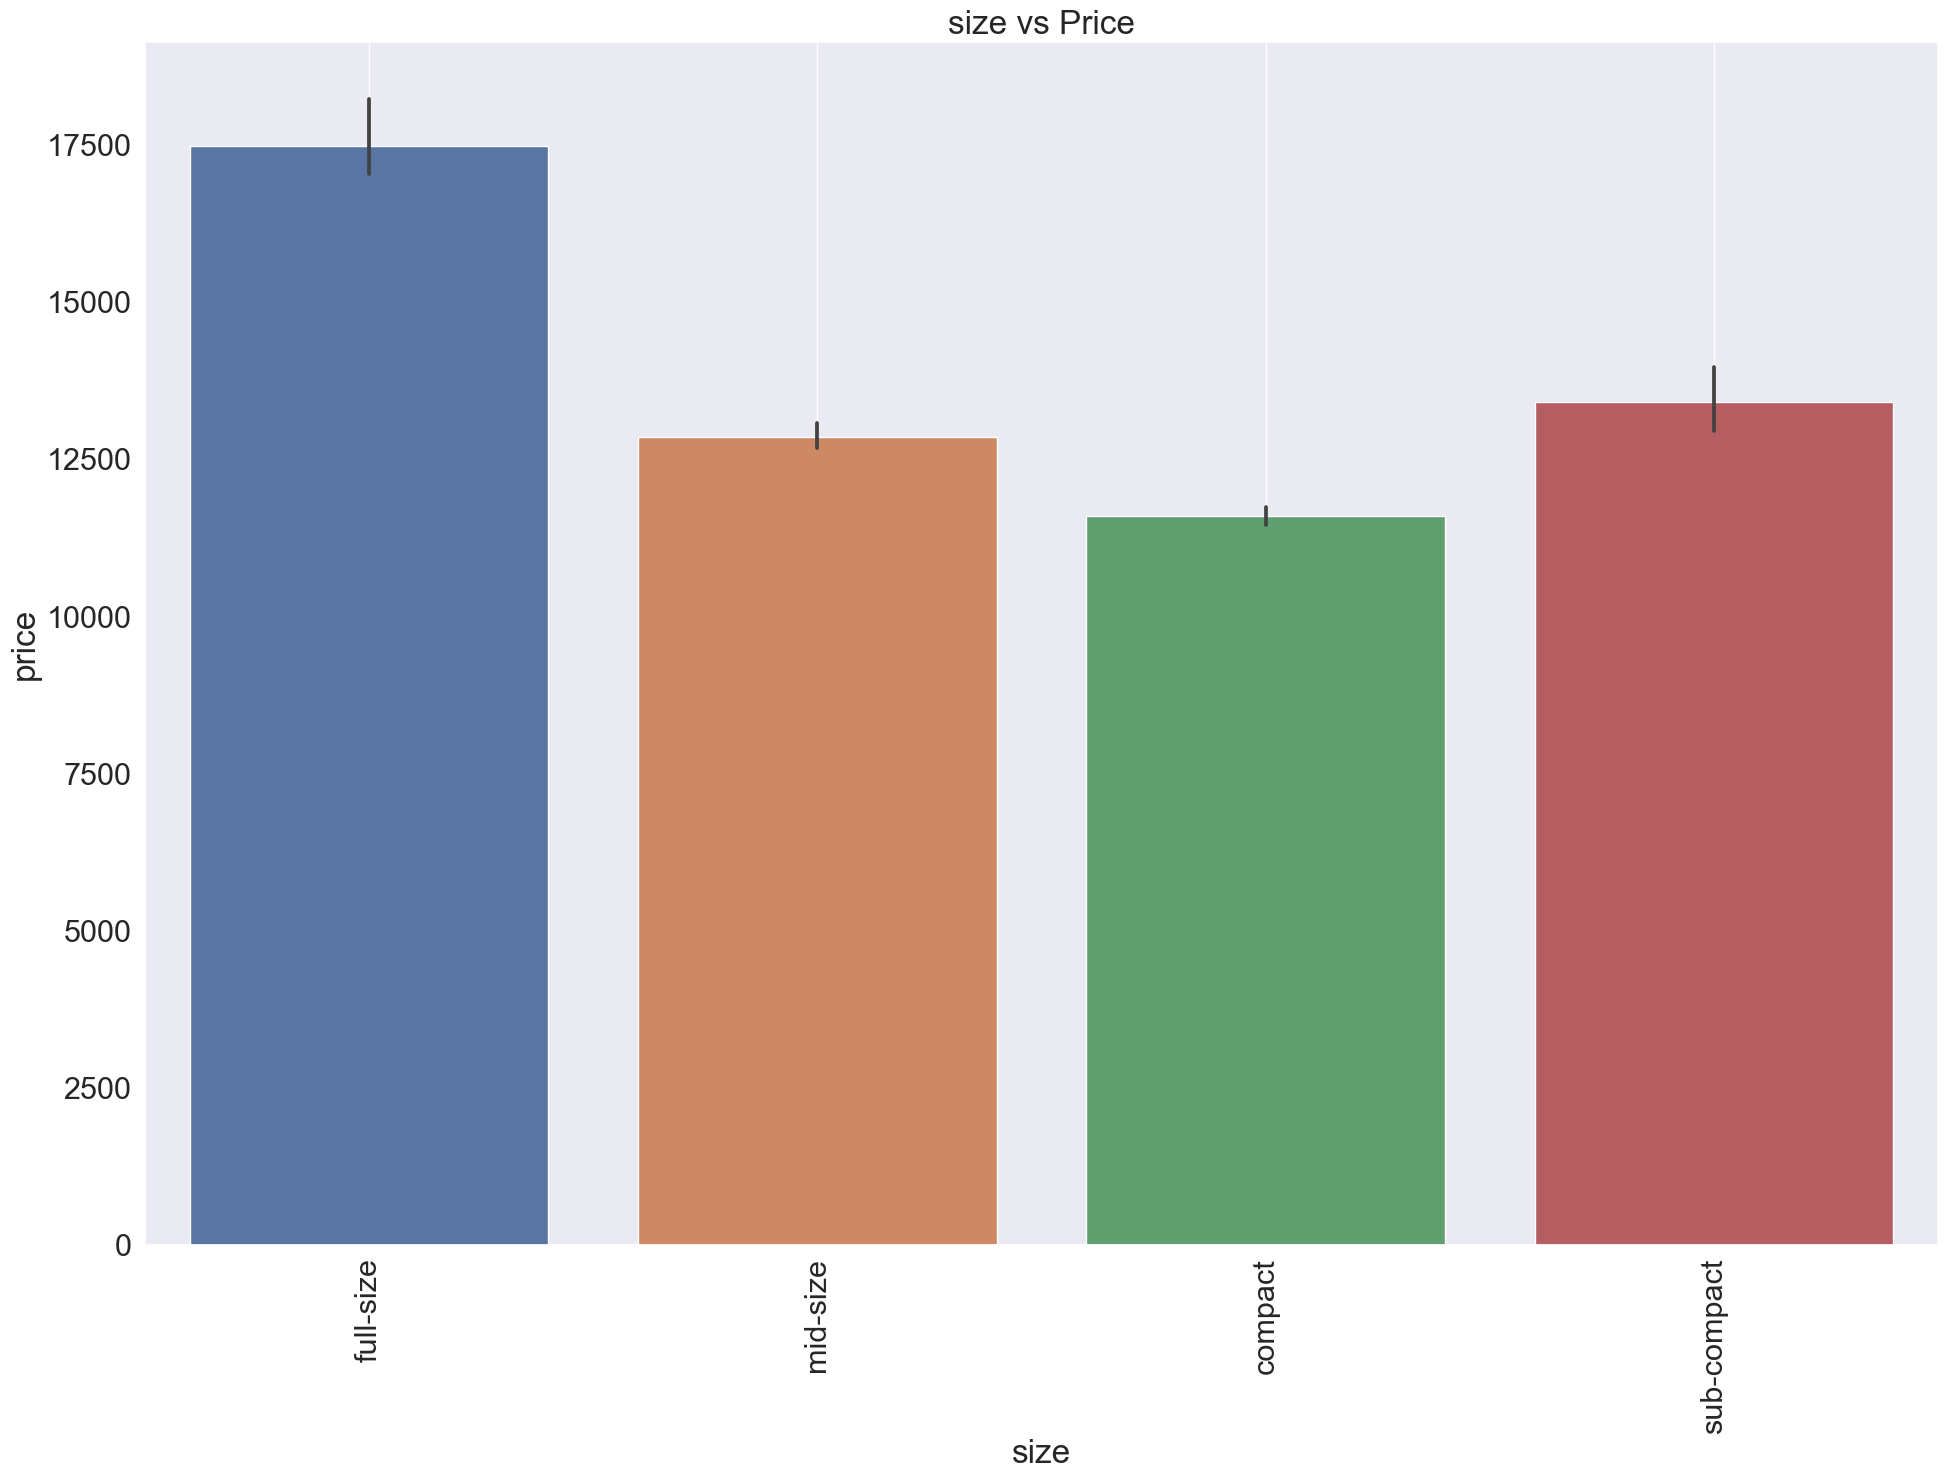

In [31]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='size', y='price', data=data)
plt.grid()
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('size vs Price')
plt.savefig('./images/size_vs_price.png')
#plt.show()

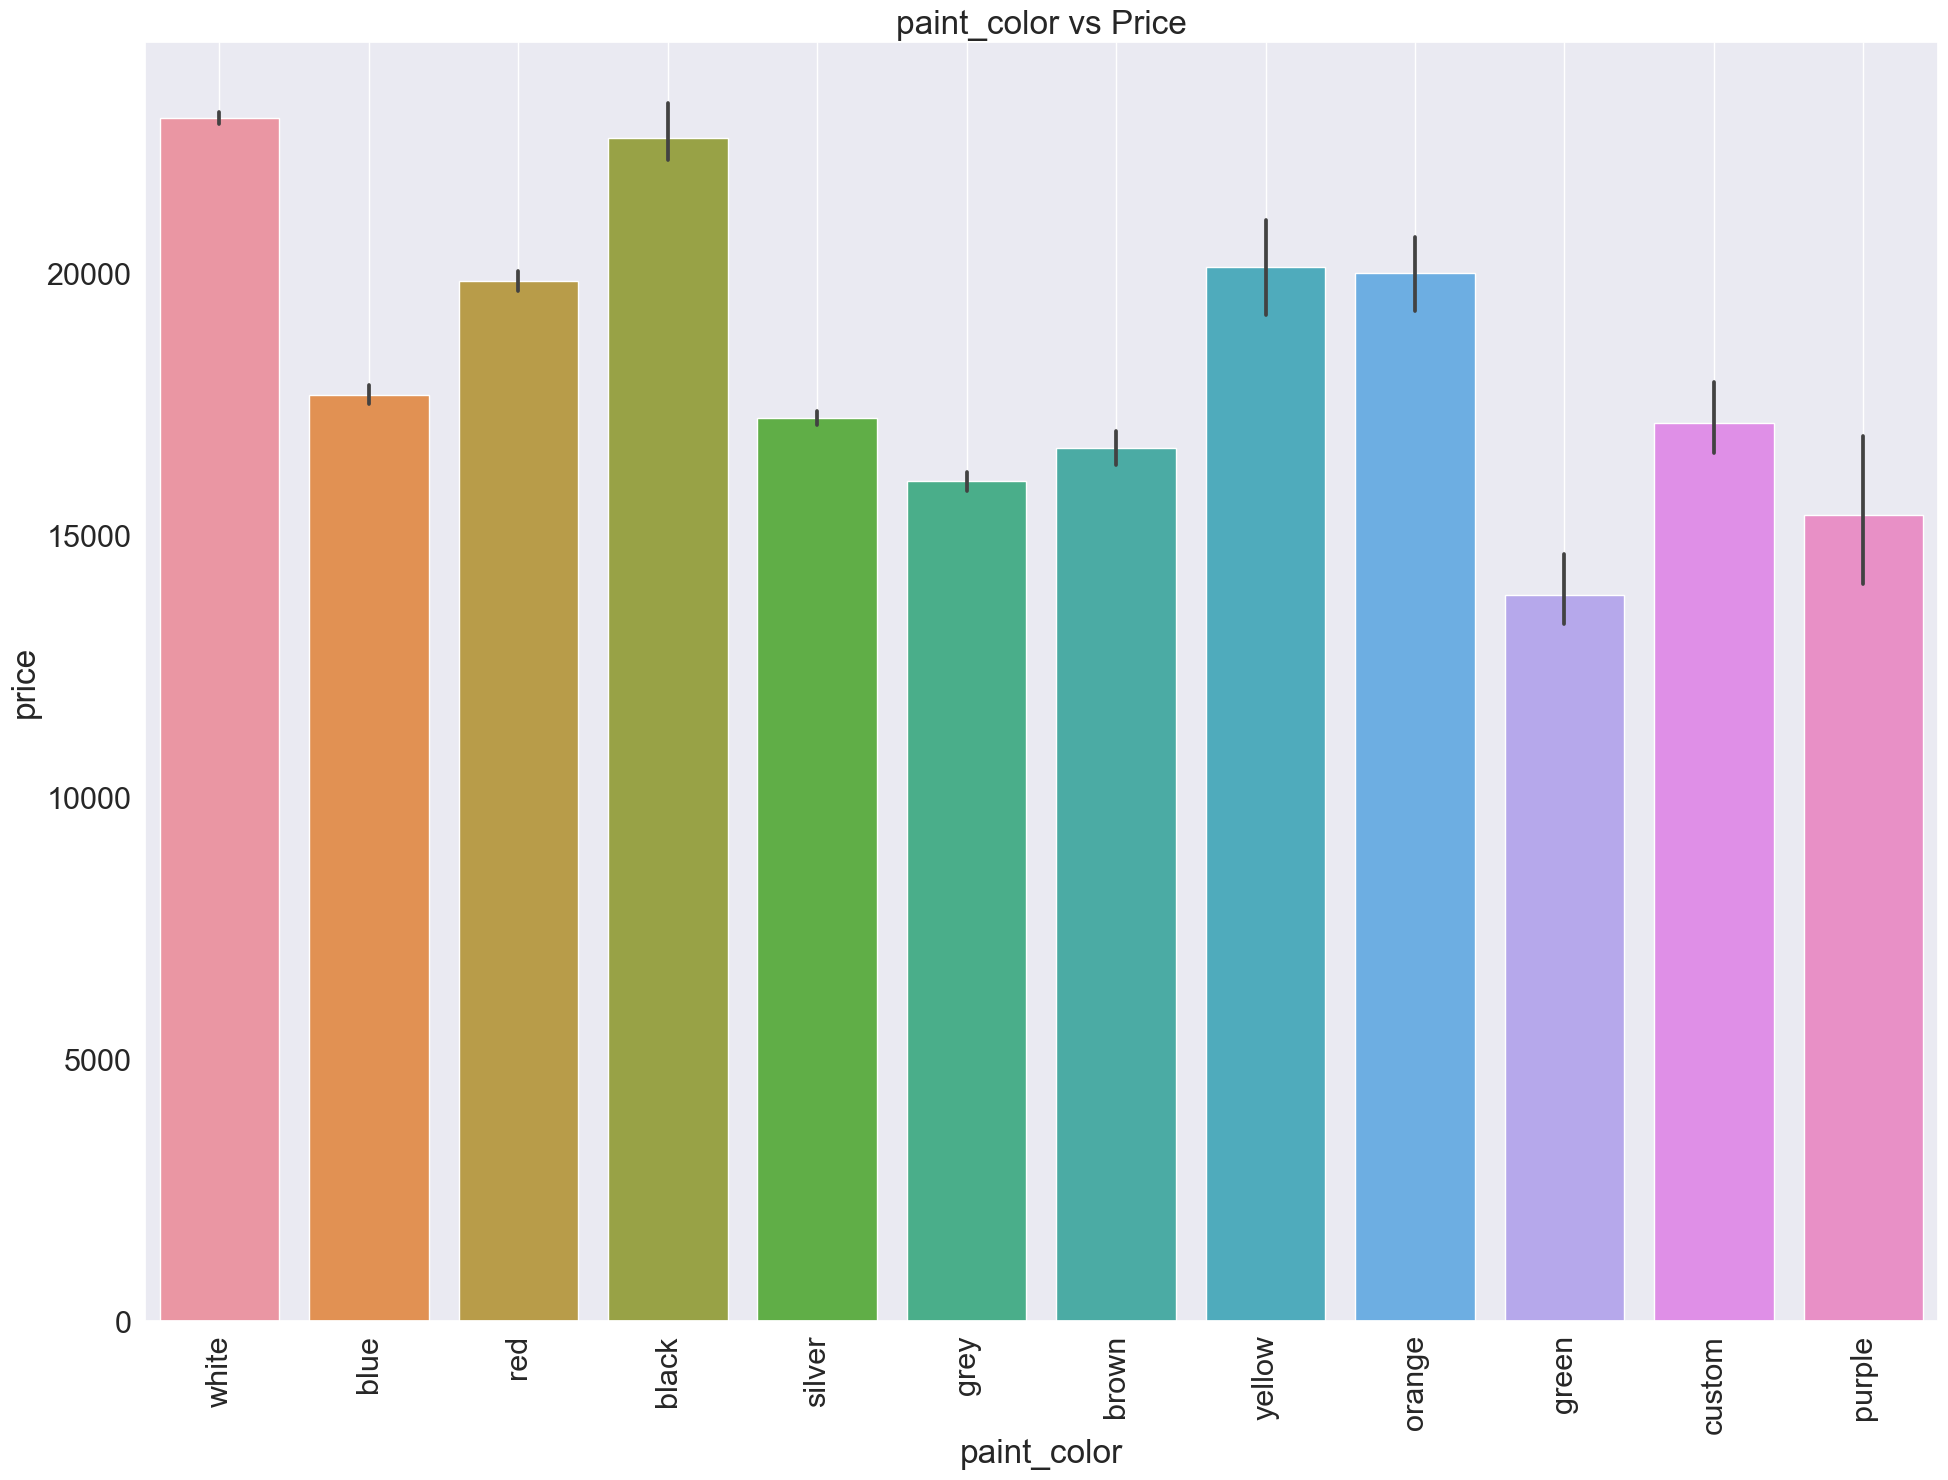

In [32]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='paint_color', y='price', data=data)
plt.grid()
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('paint_color vs Price')
plt.savefig('./images/color_vs_price.png')
#plt.show()

## Conclusion3: Observation on Categorical Data
- size : full size , supcompact came most expensive, transmission : automatic came as most expensive
- ferrai, tesla, ram. martin came as most expensive cars
- automatic came more expensive than manual
- diesel, electric fuel type drive cars came as most expensive
- pickup, truck, coupue, came =more expensive than other type
- good, new, like new, excellent came more expensive than other look category
- paint color , drive, state  has no great impact

C:\Users\m3naej\AppData\Local\Temp\ipykernel_24312\3014451780.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['paint_color', 'drive', 'state', 'year','title_status','size'], inplace=True)
C:\Users\m3naej\AppData\Local\Temp\ipykernel_24312\3014451780.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True ,cmap="YlGnBu" )


,price,manufacturer,condition,fuel,odometer,transmission,cylinders,type,Car-Age
27,33590,gmc,good,gas,57923.0,other,8.0,pickup,9.0
28,22590,chevrolet,good,gas,71229.0,other,8.0,pickup,13.0
29,39590,chevrolet,good,gas,19160.0,other,8.0,pickup,3.0
30,30990,toyota,good,gas,41124.0,other,8.0,pickup,6.0
31,15000,ford,excellent,gas,128000.0,automatic,6.0,truck,10.0


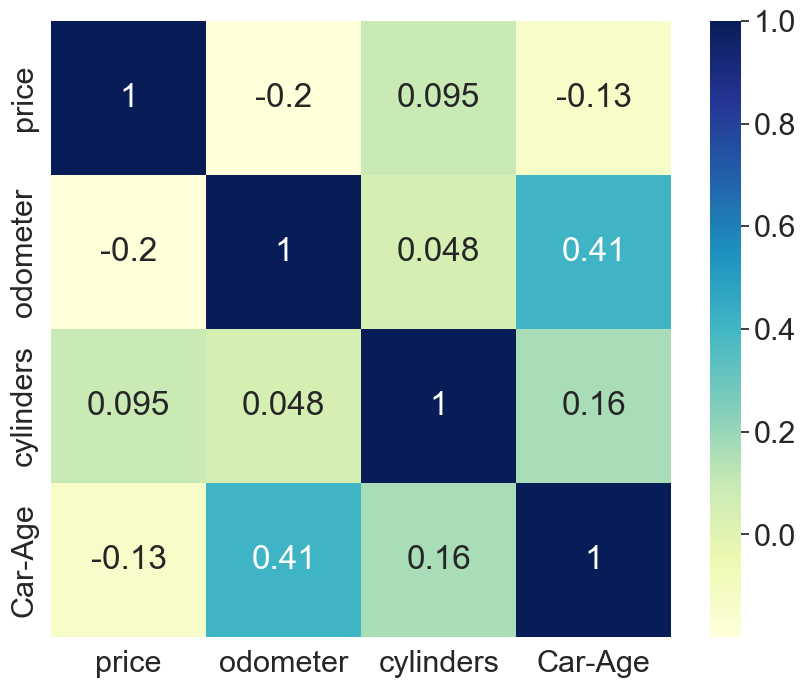

In [33]:
#Drop more irrelevant coloumns & Coloumns with many missed data
#data = vech_df.loc[(vech_df['odometer'] < 500000) & (vech_df['price'] < 99999999) & (vech_df['price'] > 1000)].dropna()
data = vech_df.loc[(vech_df['odometer'] < 500000) & (vech_df['price'] < 99999999) & (vech_df['price'] > 1000)]
data.drop(columns=['paint_color', 'drive', 'state', 'year','title_status','size'], inplace=True)
data = data.dropna()
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True ,cmap="YlGnBu" )
plt.savefig('./images/corr_fig2.png')
#plt.show()
data.head()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

## Model1 : Multiple Linear Regression Model with all Parameters 

In [34]:
# price	manufacturer	condition	fuel	odometer	transmission	cylinders	type	Car-Age
# Convert Categorical Data to Numerical Data Using OneHot and Ordinal Transformers
dummies = pd.get_dummies(data[['condition','fuel','transmission', 'type']])
data_dummies = pd.concat([data, dummies], axis=1)
ordinal = OrdinalEncoder()
data_ordinal = ordinal.fit_transform(data[['manufacturer']])
car_data = ''
car_data = data_dummies
car_data ['manufacturer_ordinal'] = data_ordinal

#Data Split & Linear Regression Model
car_data.drop(columns=['manufacturer','condition','fuel', 'transmission', 'type'], inplace=True)
X,y = '',''
X_train, X_test, y_train, y_test = '','','',''
X = car_data.drop(["price"], axis=1)
y = car_data[["price"]]

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size = 0.3)
first_linreg_model = LinearRegression()
first_linreg_model.fit(X_train, y_train)
train_preds1 = first_linreg_model.predict(X_train)
test_preds1 = first_linreg_model.predict(X_test)
train_mse1 = mean_squared_error(y_train,train_preds1)
test_mse1 = mean_squared_error(y_test,test_preds1)
print(f'Train MSE: {train_mse1: .2f}')
print(f'Test MSE: {test_mse1: .2f}')

Train MSE:  2190348734.91
Test MSE:  161754011.45


In [35]:
coefs = ''
feature_names = ''
coefs= first_linreg_model.coef_
feature_names = X_train.columns
print ("Model1 COEF.")
pd.DataFrame(coefs, columns = feature_names).T

Model1 COEF.


,0
odometer,-0.105502
cylinders,2298.957745
Car-Age,-361.549933
condition_excellent,-136.122215
condition_fair,-3499.500555
condition_good,-148.873015
condition_like new,859.549952
condition_new,8021.215591
condition_salvage,-5096.269757
fuel_diesel,9545.444136


## Model2: Multiple Regression : Sequential Feature Selection with 8 Features

In [36]:
selector1 = SequentialFeatureSelector(LinearRegression(), n_features_to_select=8)
#best_features = selector.fit_transform(X_train,y_train)
#best_features_df = pd.DataFrame(best_features, columns = selector.get_feature_names_out())
#best_features_df.head(10)

Pipe_1 = Pipeline([('feature_selector', selector1), ('linreg', LinearRegression())])
Pipe_1.fit(X_train, y_train)
train_preds2 = Pipe_1.predict(X_train)
test_preds2 = Pipe_1.predict(X_test)
train_mse2 = mean_squared_error(y_train,train_preds2)
test_mse2 = mean_squared_error(y_test,test_preds2)

print(f'Train MSE: {train_mse2: .2f}')
print(f'Test MSE: {test_mse2: .2f}')

Train MSE:  2192786552.32
Test MSE:  163880774.37


In [37]:
coefs = ''
feature_names = ''
coefs= Pipe_1.named_steps['linreg'].coef_
feature_names = selector1.get_feature_names_out()
print ("Model2 COEF.")
pd.DataFrame(coefs, columns = feature_names).T

Model2 COEF.


,0
odometer,-0.109589
cylinders,2369.956694
Car-Age,-376.863652
fuel_diesel,15147.349136
transmission_automatic,-2903.630989
type_hatchback,-5816.664618
type_sedan,-4348.938822
type_wagon,-3650.352317


## Hyper Parameters Using GridSearch : No of Features in Sequential Feature Selection

In [38]:
grid = ''
train_preds2_2 = ''
test_preds2_2 = ''
train_mse2_2 = ''
test_mse2_2 = ''
selector2 = ''

selector2 = Pipeline([('selector', SequentialFeatureSelector(LinearRegression())),('model', LinearRegression())])
param_dict = {}

param_dict = {'selector__n_features_to_select': [2,4]}
grid = GridSearchCV(selector2, param_grid=param_dict)
grid.fit(X_train, y_train)
train_preds2_2 = grid.predict(X_train)
test_preds2_2 =  grid.predict(X_test)
train_mse2_2 = mean_squared_error(y_train, train_preds2_2)
test_mse2_2 = mean_squared_error(y_test, test_preds2_2)
print(f'Train MSE: {train_mse2_2}')
print(f'Test MSE: {test_mse2_2}')

Train MSE: 2198284217.780632
Test MSE: 169330885.3937676


In [39]:
#Evaluate Best Estimator 
best_estimator1 = ''
best_selector1 = ''
best_model1 = ''
feature_names1 = ''
coefs1 = ''

best_estimator1 = grid.best_estimator_
best_selector1 = best_estimator1.named_steps['selector']
best_model1 = grid.best_estimator_.named_steps['model']
feature_names1 = X_train.columns[best_selector1.get_support()]
coefs1 = best_model1.coef_

print(best_estimator1)
print(f'Features from best selector: {feature_names1}.')
print('Coefficient values: ')
print('===================')
pd.DataFrame(coefs1 , columns = feature_names1, index = ['model'])

Pipeline(steps=[('selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=4)),
                ('model', LinearRegression())])
Features from best selector: Index(['odometer', 'cylinders', 'Car-Age', 'fuel_diesel'], dtype='object').
Coefficient values: 


,odometer,cylinders,Car-Age,fuel_diesel
model,-0.119132,2984.559339,-384.304789,15407.305769


## Model3: Multiple Regression : Sequential Feature Selection with 4 Features and CV

In [40]:
train_idx, test_idx = '', ''


all_indicies = list(range(0, len(car_data)))
seed(42)
shuffle(all_indicies)
train_idx, test_idx = np.split(all_indicies, [350])

selector = SequentialFeatureSelector(estimator=LinearRegression(),
                                    n_features_to_select=4,
                                    cv = [[train_idx, test_idx]],
                                    scoring = 'neg_mean_squared_error')
model3 = selector.fit_transform(X, y)
model3_lr = ''
model_preds3 = ''
model_mse3 = ''


model3_lr = LinearRegression().fit(model3, y)
model_preds3 = model3_lr.predict(model3)
model_mse3 = mean_squared_error(y, model_preds3)
print(f'MSE: {model_mse3: .2f}')

MSE:  1589572086.81


## Model4: Ridge Regression with Scaled Data 


In [41]:
scaled_pipe = ''
train_preds4 = ''
test_preds4 = ''
train_mse4 = ''
test_mse4 = ''


scaled_pipe = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge(alpha = 1000))]).fit(X_train, y_train)
train_preds4 = scaled_pipe.predict(X_train)
test_preds4 = scaled_pipe.predict(X_test)
train_mse4 = mean_squared_error(y_train, train_preds4)
test_mse4 = mean_squared_error(y_test, test_preds4)



print(f'Train MSE: {train_mse4}')
print(f'Test MSE: {test_mse4}')
coefs = ''
feature_names = ''
coefs= scaled_pipe.named_steps['ridge'].coef_
feature_names = X_train.columns
print ("RIDGE REGRESSION COEF.")
pd.DataFrame(coefs, columns = feature_names).T

Train MSE: 2190353491.5545197
Test MSE: 161735046.12233305
RIDGE REGRESSION COEF.


,0
odometer,-6439.849941
cylinders,3399.562565
Car-Age,-3151.729302
condition_excellent,-17.853529
condition_fair,-476.021674
condition_good,-25.197730
condition_like new,257.995871
condition_new,456.777141
condition_salvage,-181.880738
fuel_diesel,2260.646441


## Model5: Model Hyper Paramters Selection # Alpha for Ridge Model Using GridSearchCV

In [42]:
params_dict = ''
train_preds5 = ''
test_preds5 = ''
train_mse5 = ''
test_mse5 = ''

scaled_pipe = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())])
params_dict = {'ridge__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0]}
#param_dict = {'ridge__alpha': np.logspace(0, 10, 50)}

grid1 = GridSearchCV(scaled_pipe, param_grid=params_dict)
grid1.fit(X_train, y_train)
train_preds5 = grid1.predict(X_train)
test_preds5 = grid1.predict(X_test)
train_mse5 = mean_squared_error(y_train, train_preds5)
test_mse5 = mean_squared_error(y_test, test_preds5)
best_alpha = grid1.best_params_

print(f'Train MSE: {train_mse5}')
print(f'Test MSE: {test_mse5}')
print(f'Best Alpha: {best_alpha}')

Train MSE: 2190353491.5545197
Test MSE: 161735046.12233305
Best Alpha: {'ridge__alpha': 1000.0}


## Model6 Lasso Regression 

In [43]:
lasso_pipe = ''
lasso_coefs = ''

lasso_pipe = Pipeline([('scaler', StandardScaler()),
                      ('lasso', Lasso(random_state = 42))])
lasso_pipe.fit(X_train, y_train)
train_preds6 = lasso_pipe.predict(X_train)
test_preds6 = lasso_pipe.predict(X_test)
train_mse6 = mean_squared_error(y_train, train_preds6)
test_mse6 = mean_squared_error(y_test, test_preds6)
lasso_coefs = lasso_pipe.named_steps['lasso'].coef_

#print(lasso_coefs)
print(f'Train MSE: {train_mse6}')
print(f'Test MSE: {test_mse6}')

Train MSE: 2190348759.7657304
Test MSE: 161753934.13007742


C:\Users\m3naej\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.665e+12, tolerance: 3.157e+10
  model = cd_fast.enet_coordinate_descent(


In [44]:
coefs = ''
feature_names = ''
coefs= lasso_pipe.named_steps['lasso'].coef_
feature_names = X_train.columns
lasso_df = ''
lasso_df = pd.DataFrame({'feature': feature_names, 'coef': coefs})
lasso_df.loc[lasso_df['coef']!= 0]

,feature,coef
0,odometer,-6507.531954
1,cylinders,3434.936995
2,Car-Age,-3171.121820
4,condition_fair,-463.590254
5,condition_good,-3.890635
6,condition_like new,261.548962
7,condition_new,457.403060
8,condition_salvage,-179.105267
9,fuel_diesel,2454.427601
10,fuel_electric,356.225293


## Model7 : Linear Regression with LASSO For Feature Selection 

In [45]:
lasso_selector_pipe = Pipeline([('scaler', StandardScaler()),
                                ('selector', SelectFromModel(Lasso())),
                                    ('linreg', LinearRegression())])
train_mse = ''
selector_test_mse = ''



lasso_selector_pipe.fit(X_train, y_train)
train_preds7 = lasso_selector_pipe.predict(X_train)
test_preds7 = lasso_selector_pipe.predict(X_test)
train_mse7 = mean_squared_error(y_train, train_preds7)
test_mse7 = mean_squared_error(y_test, test_preds7)


print(f'Train MSE: {train_mse7}')
print(f'Test MSE: {test_mse7}')

C:\Users\m3naej\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.665e+12, tolerance: 3.157e+10
  model = cd_fast.enet_coordinate_descent(


Train MSE: 2190348939.754335
Test MSE: 161756095.854319


In [46]:
coefs = ''
feature_names = ''
coefs= lasso_selector_pipe.named_steps['linreg'].coef_
feature_names = X_train.columns
#pd.DataFrame({'feature': feature_names, 'coef': coefs})
#pd.DataFrame(coefs, columns = feature_names).T

## Model 8 : Linear Regression with high polynomial degress and cross validation Using Features Recommended from Sequential Feature Selector

In [47]:
X,y = '',''
X_train, X_test, y_train, y_test = '','','',''
X = car_data[['odometer','cylinders','Car-Age']]
y = car_data[["price"]]
#split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size = 0.3)

In [48]:
pipe = ''
pipe = Pipeline([('poly_features', PolynomialFeatures(degree = 3, include_bias = False)),
                                ('scaler', StandardScaler()),
                                ('selector', SelectFromModel(Ridge())),
                                    ('linreg', LinearRegression())])
train_preds8 = ''
test_preds8 = ''
train_mse8 = ''
test_mse8 = ''

pipe.fit(X_train, y_train)
train_preds8 = pipe.predict(X_train)
test_preds8 = pipe.predict(X_test)
train_mse8 = mean_squared_error(y_train, train_preds8)
test_mse8 = mean_squared_error(y_test, test_preds8)

print(f'Train MSE: {train_mse8}')
print(f'Test MSE: {test_mse8}')

Train MSE: 2193115162.6689672
Test MSE: 161135123.1722551


## Using K-Fold Cross Validation

In [49]:

from sklearn.model_selection import KFold
X,y = '',''
X = car_data[['odometer','cylinders','Car-Age']]
y = car_data[["price"]]

X_train,X_test, y_train, y_test = '', '', '', ''
kf = KFold(n_splits=5)
#K_Fold = LinearRegression()
K_Fold = pipe.named_steps['linreg']
kfold_train_scores = []
kfold_test_scores = []

for train_index, test_index in kf.split(X):
    #print (train_index, test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    K_Fold.fit(X_train,y_train)
    kfold_train_predict = K_Fold.predict(X_train) 
    kfold_test_predict = K_Fold.predict(X_test)
    kfold_train_scores.append(mean_squared_error(y_train, kfold_train_predict))
    kfold_test_scores.append(mean_squared_error(y_test, kfold_test_predict))
    
print ("mean of train MSE", np.mean(kfold_train_scores))
print ("mean of test MSE", np.mean(kfold_test_scores))

mean of train MSE 1597771257.707252
mean of test MSE 1598065359.2432578


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

## Evluation for above 8 Models
<center>
    <img src = images/Picture2.png width = 50%/>
</center>

The 8 Models have been Evluated Using MSE , the best results obtained by 
- Apply Grid Search with Best No of Feature Selection Using all Parameter in Linear Regression 
- Best MSE for training and test data obtained By 
-- Linear Regression Model, with polynomial degree of 3 to 3 numerical parameters (Odometer, Car Age, Cylinders)
-- Feature Selection Done by Ridge
-- Using 5-Fold Cross Validation
- Paramerters highly impact Car Price are Odometer, Car_Age and No of Cylnders.


## Models Parameters Interpretation 
- Model of Linear Regression with All Parameters : Came with 31 Features higest positive parameters are No of Cylinders and Car Type (offroad, pickup, truck, coupe),fuel (diesel then electric), negatively impacting parameters are ondition (Salvage), type (hatchback), fuel (gas, hyprid), type (min-van, sedan)
- Linear Regression with Sequential Feature Selection up to 8 : Came with 8 Features Selection : Negatively Impact (Odometer, Car age, Transmission Automatic, type hatchback/sedan) positive impact no of cylinder, fuel(diesel)
- Lasso Came with less no of Parameters : 28 dropped some categorical parameters like condition-excellent, transmission-manual, type-suv
- Linear Model with High Polynomial Degress with K-Fold Validation came with best for odometer, Car Age and No of Cylinders as Car Price Predictor 

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

## OUR RECOMMENDATION
- The Model and Data Analaysis Demonstrates 
- Car with High Price will be ones : less odoemeter value, less car-age, high number of cylinders (may be this reflect engine strength)
- Model Parameters Weights Demonstrate that Car of Type (Offroad, pickup, truck, coupe) will come with higher price than other tyes
- Also care will fuel diesel will come higher than electric
- low price cars will be of type hatchpack, sedan,mini-van with fuel (gas)